# Insurance Claims- Fraud Detection Project

Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Downlaod Files:                                                                    
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [489]:
import pandas as pd
#import the data in a dataframe using pondas
df=pd.read_csv("Automobile_insurance_fraud.csv")

In [490]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [498]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

we can see that no missing value present in any column excepts "_c39".                               
if you deeply noticed then you can see that all the data of "_c39" column are missing.                       
so,we drop this column.                                        

In [499]:
#droping "_c39" column
df=df.drop("_c39",axis=1)

In [500]:
df.head(20)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       17-10-2014           OH   
1                  228   42         342868       27-06-2006           IN   
2                  134   29         687698       06-09-2000           OH   
3                  256   41         227811       25-05-1990           IL   
4                  228   44         367455       06-06-2014           IL   
5                  256   39         104594       12-10-2006           OH   
6                  137   34         413978       04-06-2000           IN   
7                  165   37         429027       03-02-1990           IL   
8                   27   33         485665       05-02-1997           IL   
9                  212   42         636550       25-07-2011           IL   
10                 235   42         543610       26-05-2002           OH   
11                 447   61         214618       29-05-1999           OH   
12                  60   23         842643       20-11-1997           OH   
13                 121   34         626808       26-10-2012           OH   
14                 180   38         644081       28-12-1998           OH   
15                 473   58         892874       19-10-1992           IN   
16                  70   26         558938       08-06-2005           OH   
17                 140   31         275265       15-11-2004           IN   
18                 160   37         921202       28-12-2014           OH   
19                 196   39         143972       02-08-1992           IN   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406.91               0   
1     250/500               2000                1197.22         5000000   
2     100/300               2000                1413.14         5000000   
3     250/500               2000                1415.74         6000000   
4    500/1000               1000                1583.91         6000000   
5     250/500               1000                1351.10               0   
6     250/500               1000                1333.35               0   
7     100/300               1000                1137.03               0   
8     100/300                500                1442.99               0   
9     100/300                500                1315.68               0   
10    100/300                500                1253.12         4000000   
11    100/300               2000                1137.16               0   
12   500/1000                500                1215.36         3000000   
13    100/300               1000                 936.61               0   
14    250/500               2000                1301.13               0   
15    100/300               2000                1131.40               0   
16   500/1000               1000                1199.44         5000000   
17   500/1000                500                 708.64         6000000   
18   500/1000                500                1374.22               0   
19   500/1000               2000                1475.73               0   

    insured_zip  ... witnesses police_report_available total_claim_amount  \
0        466132  ...         2                     YES              71610   
1        468176  ...         0                       ?               5070   
2        430632  ...         3                      NO              34650   
3        608117  ...         2                      NO              63400   
4        610706  ...         1                      NO               6500   
5        478456  ...         2                      NO              64100   
6        441716  ...         0                       ?              78650   
7        603195  ...         2                     YES              51590   
8        601734  ...         1                     YES              27700   
9        600983  ...         1                       ?       

In [501]:
#vhecking null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

now our data is free from missing values

In [502]:
#checking shape of the Dataframe
df.shape

(1000, 39)

our dataframe has 1000 rows and 39 columns.It means we have 1000 customer's 39 type of data.

# Exploratory Data Analysis (EDA)

In [503]:
#import libraries for ploting and advanced visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [504]:
#checking info(colum name , non-null count , data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

three type data present in our dataframe                                    
-int64                         
-float64                                     
-object                           

In [505]:
df.dtypes.index

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [506]:
#Making a list of all numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
[0, 1, 2, 6, 7, 8, 9, 15, 16, 25, 26, 28, 29, 31, 32, 33, 34, 37]


In [507]:
len(numerical_columns)

18

we have 18 numericals column in the data

In [508]:
#Making a list of all categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
[3, 4, 5, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 27, 30, 35, 36, 38]


In [509]:
len(categorical_columns)

21

we have 21 categorical columns in the data

# Univariate Analysis:

//months_as_customer//

column Name: months_as_customer


194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
len= 391


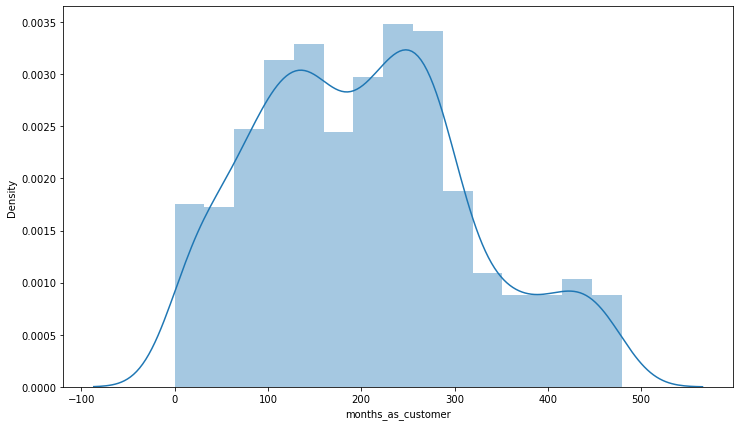



####################################################################################################


In [328]:
#Numerical column
i=0 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

The curve likes a normal distribution curve                                                  
Most customers between 100 and 280 months as a customer
number of unique values in the column = 391

column Name: age


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
len= 46


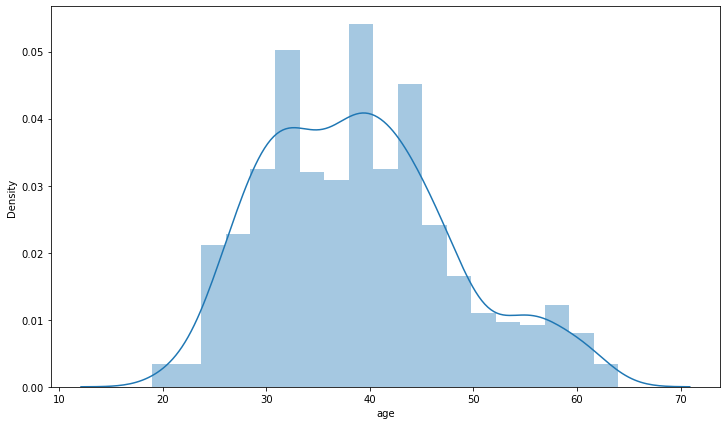



####################################################################################################


In [329]:
#numerical column
i=1 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

some posetive skewness present in the age column of the dataset.                                    
most of the customer's age between 30 and 45                                   
the number of unique values in the column = 46

column Name: policy_number


296960    1
206213    1
853360    1
521585    1
290162    1
         ..
276804    1
426708    1
963285    1
789208    1
116735    1
Name: policy_number, Length: 1000, dtype: int64
len= 1000


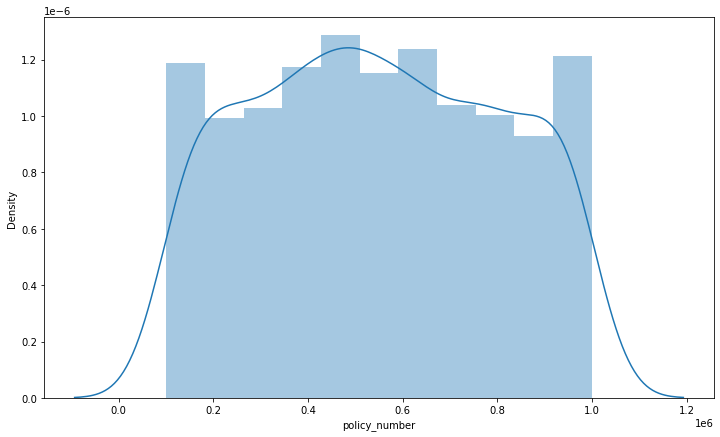



####################################################################################################


In [330]:
#numerical column
i=2 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

the number of unique values in the column = the number of rows = 1000                                                  
this column is for identification of each customer                      
we do not need this type column for model input                                                                    
so,we drop this column

In [331]:
#append "policy_number" column in drop_columns list
drop_columns=[]
drop_columns.append("policy_number")

column Name: policy_bind_date


01-01-2006    3
05-08-1992    3
28-04-1992    3
11-03-2010    2
04-05-2000    2
             ..
18-10-2012    1
05-05-1991    1
18-03-2008    1
28-03-2001    1
13-05-2001    1
Name: policy_bind_date, Length: 951, dtype: int64
len= 951


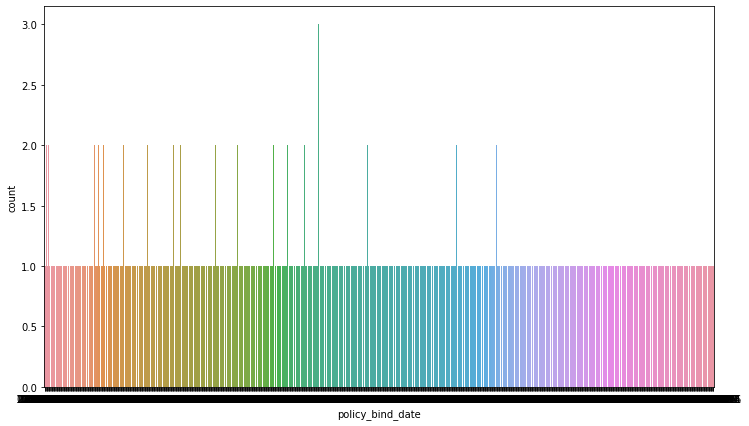



####################################################################################################


In [311]:
#Categorical column
i=3 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we have 951 different policy bind date and total policy number is 1000.                        
so,we seperate day month and year of policy bind date to reduce the various values.                                  

In [332]:
df["policy_bind_day"]=pd.to_datetime(df["policy_bind_date"]).dt.day
df["policy_bind_month"]=pd.to_datetime(df["policy_bind_date"]).dt.month
df["policy_bind_year"]=pd.to_datetime(df["policy_bind_date"]).dt.year

In [333]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... injury_claim property_claim vehicle_claim  auto_make  \
0       466132  ...         6510          13020         52080       Saab   
1       468176  ...          780            780          3510   Mercedes   
2       430632  ...         7700           3850         23100      Dodge   
3       608117  ...         6340           6340         50720  Chevrolet   
4       610706  ...         1300            650          4550     Accura   

  auto_model  auto_year  fraud_reported policy_bind_day policy_bind_month  \
0        92x       2004               Y              17                10   
1       E400       2007               Y              27                 6   
2        RAM       2007               N               9                 6   
3      Tahoe       2014               Y              25                 5   
4        RSX       2009               N               6                 6   

  policy_bind_year  
0             2014  
1             2006  
2             2000  
3             1990  
4             2014  

[5 rows x 42 columns]

column Name: policy_bind_year


1991    55
2002    50
1990    48
1992    48
1997    44
2014    43
1996    43
2009    43
2006    41
1994    41
2001    41
1999    40
2007    40
2005    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
2008    33
1993    33
2011    32
2000    31
1998    30
2015     3
Name: policy_bind_year, dtype: int64
len= 26


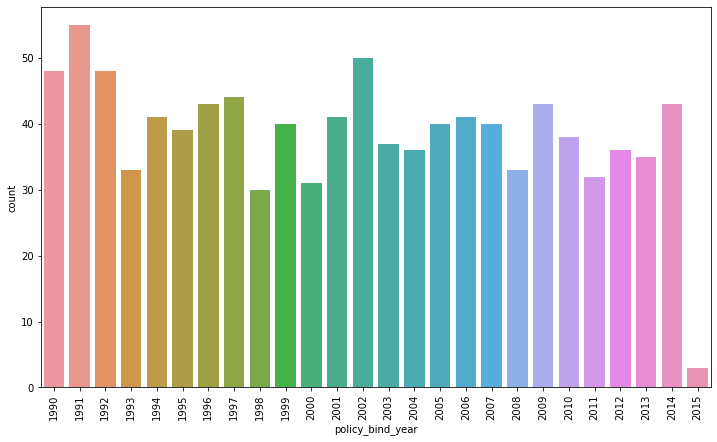



####################################################################################################


In [334]:
#Categorical column
i=-1 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

the number of customer highest in 1991                                               
the number of customer lowest in 2015                                                                   
We have data from the last 26 years

In [335]:
#Categorical column
i=-2 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: policy_bind_month


7     96
11    91
9     87
4     86
6     86
5     84
8     82
1     80
3     79
10    79
12    76
2     74
Name: policy_bind_month, dtype: int64
len= 12




####################################################################################################


In [336]:
#Categorical column
i=-3 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: policy_bind_day


28    48
12    44
2     44
8     41
21    40
18    40
16    37
3     37
29    37
25    37
1     35
7     35
11    34
19    33
20    33
10    32
14    31
15    31
24    31
4     31
17    30
27    30
5     29
6     28
30    26
23    26
13    24
22    23
9     23
26    19
31    11
Name: policy_bind_day, dtype: int64
len= 31




####################################################################################################


now we get three different types of data from the policy bind date.so we will drop policy bind date column.

In [337]:
#append "policy_bind_date" column in drop_columns list
drop_columns.append("policy_bind_date")

column Name: policy_state


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
len= 3


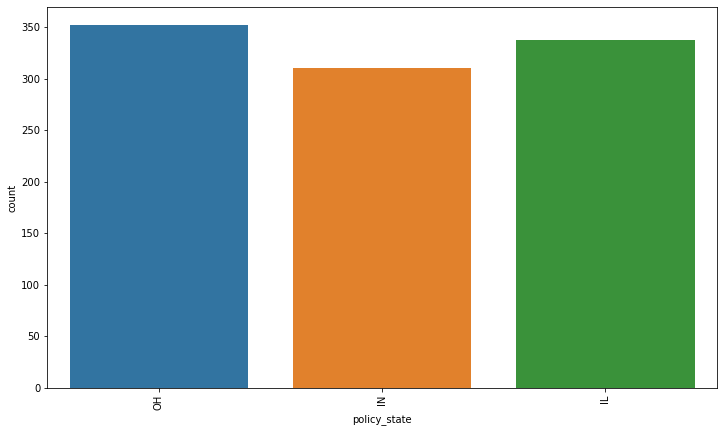



####################################################################################################


In [338]:
#Categorical column
i=4 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

the number of policy State is 3

In [339]:
#Categorical column
i=5 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: policy_csl


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
len= 3




####################################################################################################


column Name: policy_deductable


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
len= 3


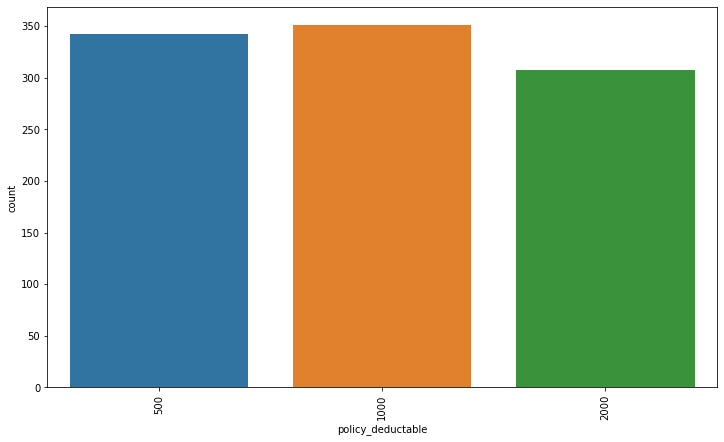



####################################################################################################


In [340]:
#Categorical column
i=6 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: policy_annual_premium


1215.36    2
1374.22    2
1389.13    2
1281.25    2
1074.07    2
          ..
1185.44    1
1243.84    1
1270.02    1
1023.11    1
1337.56    1
Name: policy_annual_premium, Length: 991, dtype: int64
len= 991


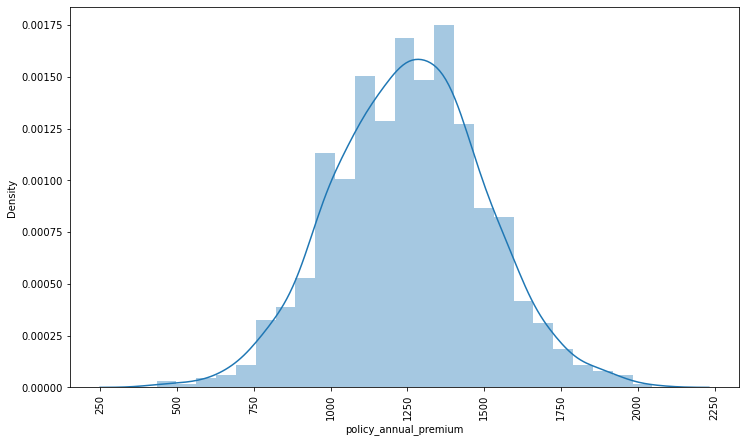



####################################################################################################


In [341]:
#Numerical column
i=7 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

The curves like normal duistribution curve

In [342]:
#Categorical column
i=8 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: umbrella_limit


 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64
len= 11




####################################################################################################


In [343]:
#Numerical column
i=8 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: umbrella_limit


 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64
len= 11




####################################################################################################


positive skewness present in the data

column Name: insured_zip


469429    2
446895    2
431202    2
456602    2
477695    2
         ..
445120    1
608963    1
449221    1
467654    1
448722    1
Name: insured_zip, Length: 995, dtype: int64
len= 995


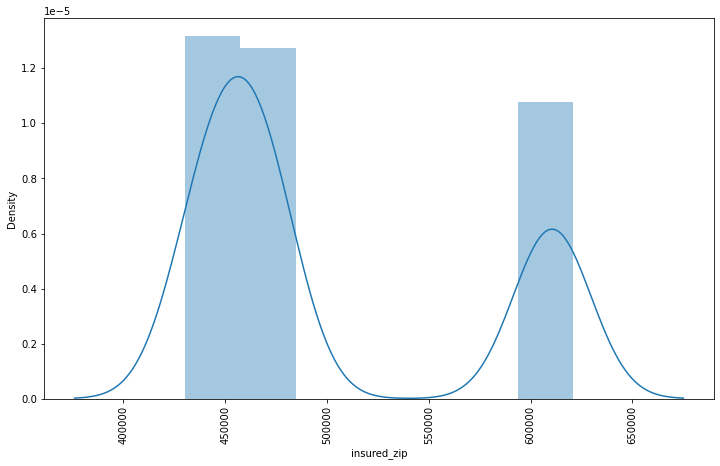



####################################################################################################


In [344]:
#Numerical column
i=9 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

since the length of "insured_zip" is nearly the number of rows,we drop this column

In [345]:
#append "insured_zip" column in drop_columns list
drop_columns.append("insured_zip")

column Name: insured_sex


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
len= 2


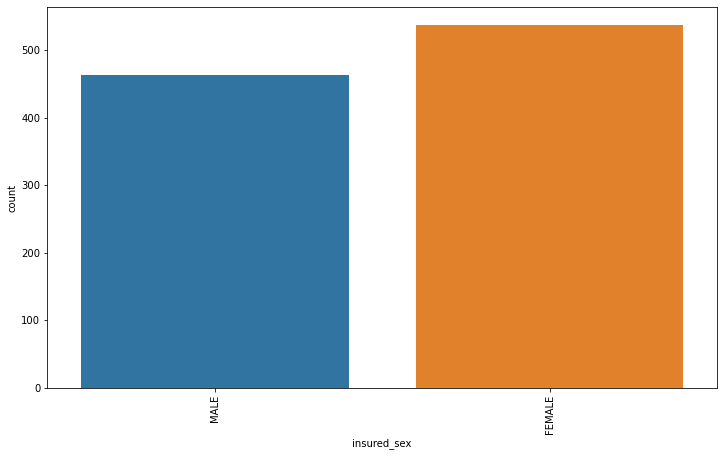



####################################################################################################


In [346]:
#Categorical column
i=10 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

we can see that the number of male customer is less than the number of female customer

In [347]:
#Categorical column
i=11 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: insured_education_level


JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
len= 7




####################################################################################################


we can see that The highest educational qualification of the customer is High school or JD

In [348]:
#Categorical column
i=12 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: insured_occupation


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
len= 14




####################################################################################################


column Name: insured_hobbies


reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
len= 20


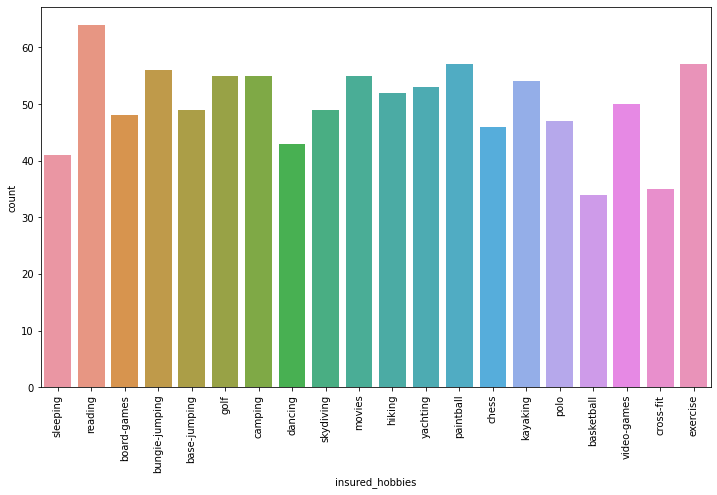



####################################################################################################


In [199]:
#Categorical column
i=13 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: insured_relationship


own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
len= 6


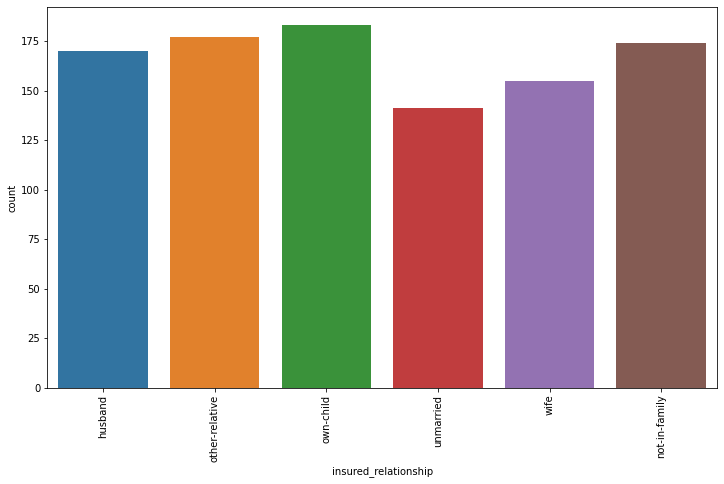



####################################################################################################


In [349]:
#Categorical column
i=14 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

In [350]:
#Numerical column
i=15 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: capital-gains


0        508
46300      5
68500      4
51500      4
45500      3
        ... 
54700      1
40100      1
33200      1
37300      1
72700      1
Name: capital-gains, Length: 338, dtype: int64
len= 338




####################################################################################################


column Name: capital-loss


 0        475
-53700      5
-50300      5
-31700      5
-51000      4
         ... 
-43300      1
-66100      1
-55900      1
-66500      1
-48000      1
Name: capital-loss, Length: 354, dtype: int64
len= 354


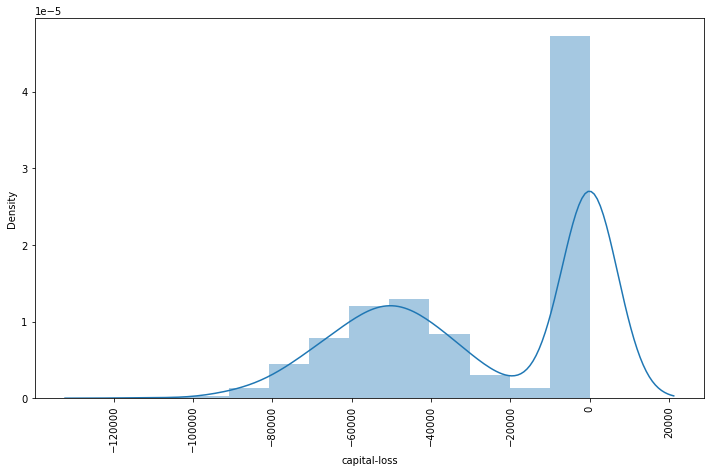



####################################################################################################


In [351]:
#Numerical column
i=16 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

since tell of distribution curve present in left side,negative skewness present in the column

column Name: incident_date


02-02-2015    28
17-02-2015    26
07-01-2015    25
04-02-2015    24
24-01-2015    24
10-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
22-02-2015    20
06-02-2015    20
31-01-2015    20
12-02-2015    20
21-01-2015    19
14-01-2015    19
12-01-2015    19
23-02-2015    19
01-01-2015    19
21-02-2015    19
14-02-2015    18
20-01-2015    18
18-01-2015    18
03-01-2015    18
01-02-2015    18
28-02-2015    18
25-02-2015    18
08-02-2015    17
24-02-2015    17
06-01-2015    17
26-02-2015    17
09-01-2015    17
13-02-2015    16
16-02-2015    16
16-01-2015    16
15-02-2015    16
05-02-2015    16
18-02-2015    15
28-01-2015    15
15-01-2015    15
17-01-2015    15
27-02-2015    14
22-01-2015    14
20-02-2015    14
09-02-2015    13
27-01-2015    13
23-01-2015    13
03-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
25-01-2015    10
19-02-2015    10
11-02-2015    10
07-02-2015    10
10

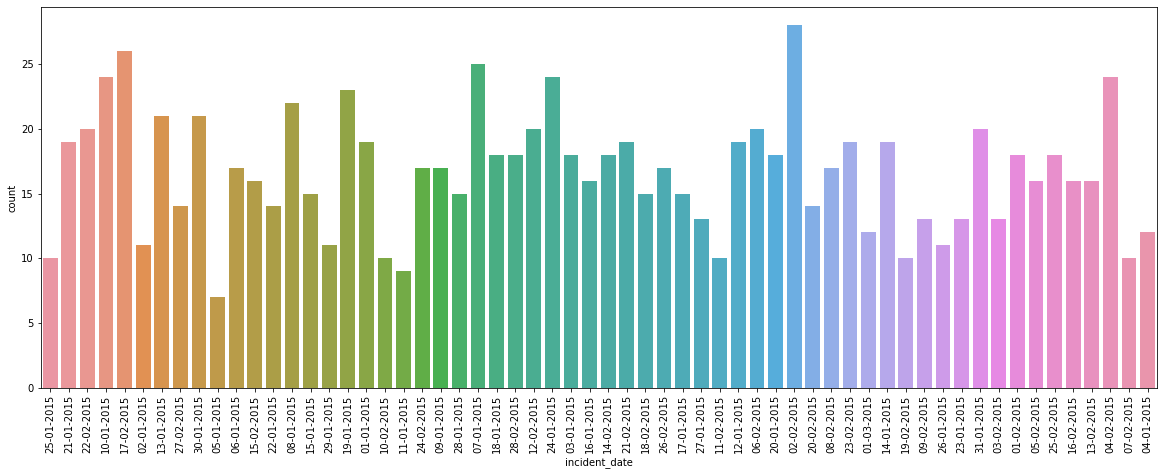



####################################################################################################


In [352]:
#Categorical column
i=17 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(20,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

since year of the all incident are same(2015),we only take day and month of the Incident Date

In [355]:
df["incident_day"]=pd.to_datetime(df["incident_date"]).dt.day
df["incident_month"]=pd.to_datetime(df["incident_date"]).dt.month

In [356]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... vehicle_claim  auto_make auto_model auto_year  \
0       466132  ...         52080       Saab        92x      2004   
1       468176  ...          3510   Mercedes       E400      2007   
2       430632  ...         23100      Dodge        RAM      2007   
3       608117  ...         50720  Chevrolet      Tahoe      2014   
4       610706  ...          4550     Accura        RSX      2009   

  fraud_reported  policy_bind_day  policy_bind_month policy_bind_year  \
0              Y               17                 10             2014   
1              Y               27                  6             2006   
2              N                9                  6             2000   
3              Y               25                  5             1990   
4              N                6                  6             2014   

  incident_day incident_month  
0           25              1  
1           21              1  
2           22              2  
3            1             10  
4           17              2  

[5 rows x 44 columns]

column Name: incident_month


1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64
len= 12


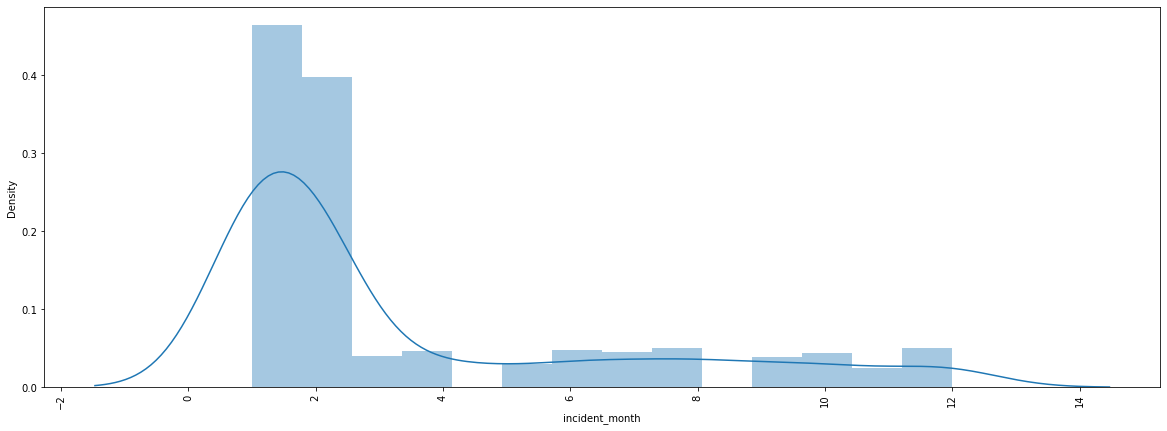



####################################################################################################


In [357]:
#Numerical column
i=-1 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(20,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

positive skewness present in the column.we have to handle it .

column Name: incident_day


1     200
2     199
17     41
24     41
21     38
14     37
13     37
22     34
28     33
18     33
19     33
23     32
20     32
16     32
15     31
25     28
26     28
27     27
30     21
31     20
3      12
29     11
Name: incident_day, dtype: int64
len= 22


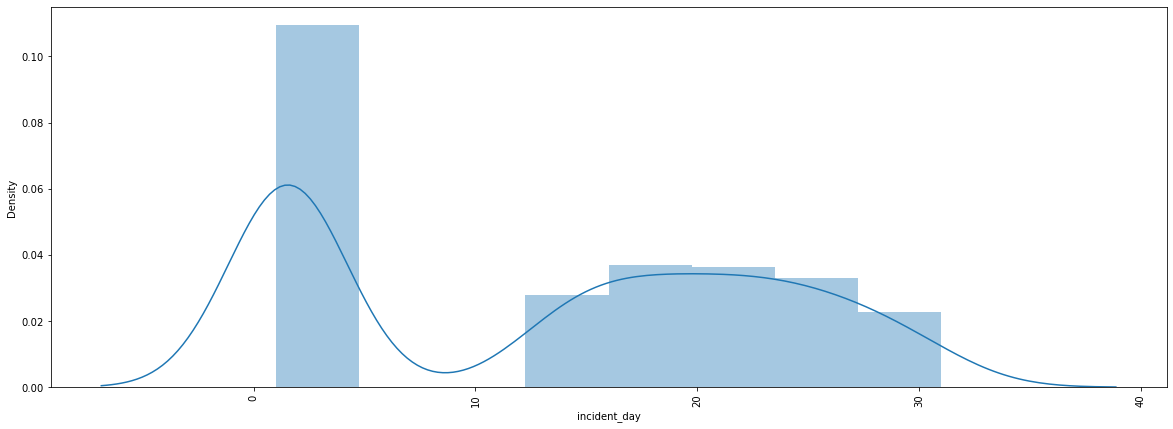



####################################################################################################


In [358]:
#Numerical column
i=-2 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(20,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

positive skewness present in the column.we have to handle it.

Now we don't need "incident_date" column.

In [359]:
#append "incident_date" column in drop_columns list
drop_columns.append("incident_date")

column Name: incident_type


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
len= 4


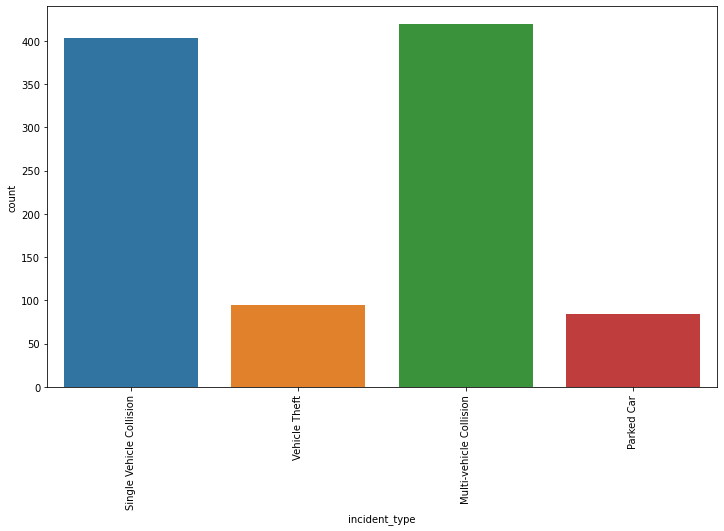



####################################################################################################


In [360]:
#Categorical column
i=18 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: collision_type


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
len= 4


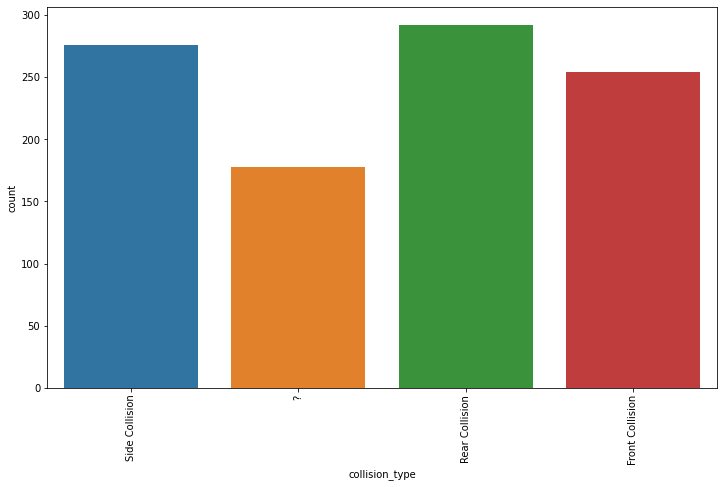



####################################################################################################


In [361]:
#Categorical column
i=19 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

In [362]:
df[df['collision_type']=='?']

months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868       27-06-2006           IN   
4                   228   44         367455       06-06-2014           IL   
13                  121   34         626808       26-10-2012           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
..                  ...  ...            ...              ...          ...   
964                 163   37         390256       25-11-2009           IN   
969                 398   55         844062       25-05-1990           OH   
983                  17   39         774895       28-10-2006           IL   
994                 141   30         681486       24-03-2007           IN   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
1      250/500               2000                1197.22         5000000   
4     500/1000               1000                1583.91         6000000   
13     100/300               1000                 936.61               0   
26     100/300               2000                1322.10               0   
27     100/300                500                 848.07         3000000   
..         ...                ...                    ...             ...   
964   500/1000               1000                1200.33         4000000   
969    250/500                500                 862.19               0   
983    250/500               1000                 840.95               0   
994   500/1000               1000                1347.04               0   
999    250/500               1000                 766.19               0   

     insured_zip  ... vehicle_claim   auto_make  auto_model auto_year  \
1         468176  ...          3510    Mercedes        E400      2007   
4         610706  ...          4550      Accura         RSX      2009   
13        464652  ...          5040      Toyota  Highlander      2010   
26        436984  ...          6560      Toyota       Camry      2005   
27        607730  ...          4160      Suburu   Forrestor      2003   
..           ...  ...           ...         ...         ...       ...   
964       477631  ...          2730  Volkswagen       Jetta      2008   
969       606858  ...          4800      Accura         MDX      2012   
983       431202  ...          2580      Suburu      Legacy      2002   
994       430665  ...          4860       Honda       Civic      1996   
999       612260  ...          3680    Mercedes        E400      2007   

    fraud_reported  policy_bind_day  policy_bind_month policy_bind_year  \
1                Y               27                  6             2006   
4                N                6                  6             2014   
13               N               26                 10             2012   
26               N               20                  9             1990   
27               Y               18                  7             2002   
..             ...              ...                ...              ...   
964              Y               25                 11             2009   
969              N               25                  5             1990   
983              N               28                 10             2006   
994              N               24                  3             2007   
999              N               11                 11             1996   

    incident_day incident_month  
1             21              1  
4             17              2  
13             1              8  
26            28              1  
27             1              7  
..           ...            ...  
964            2              6  
969           23              2  
983           26              2  
994           22              1  
999           2

we don't have 178 cutomer's collision_type data

column Name: incident_severity


Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
len= 4


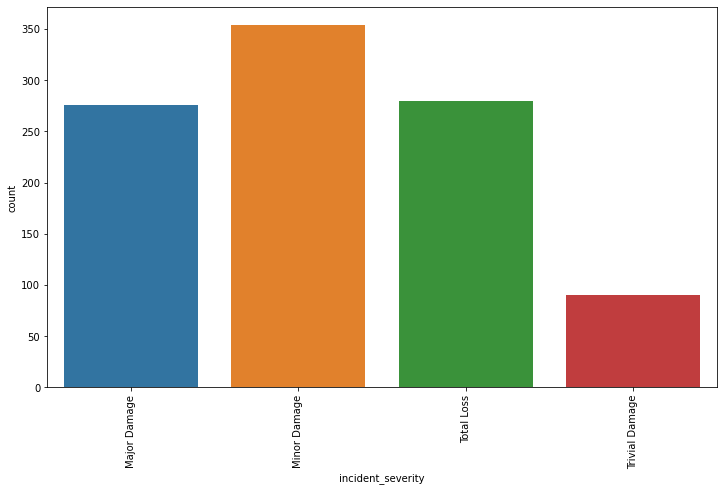



####################################################################################################


In [366]:
#Categorical column
i=20 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: authorities_contacted


Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
len= 5


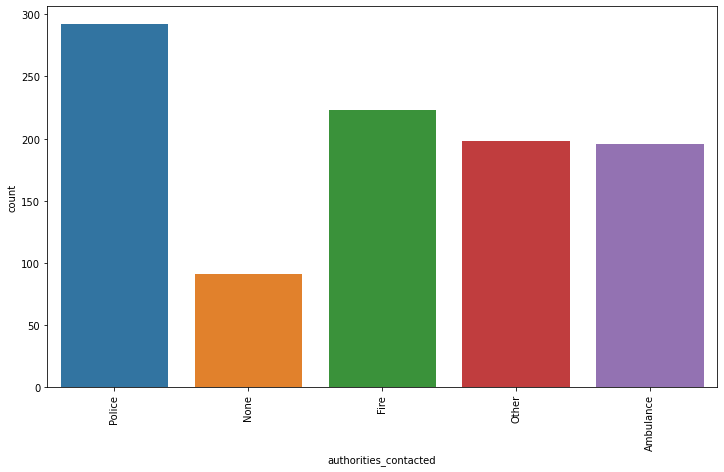



####################################################################################################


In [367]:
#Categorical column
i=21 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: incident_state


NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
len= 7


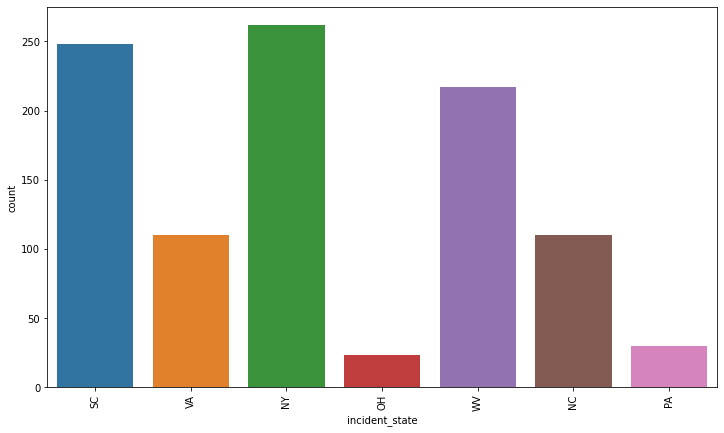



####################################################################################################


In [368]:
#Categorical column
i=22 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: incident_city


Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64
len= 7


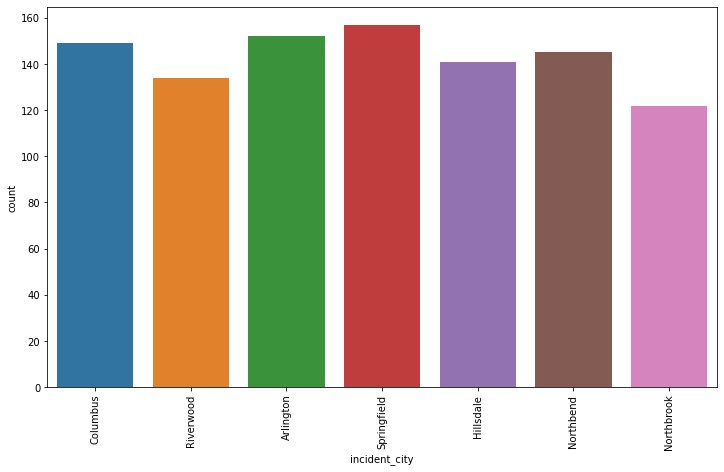



####################################################################################################


In [369]:
#Categorical column
i=23 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: incident_location


7121 Britain Drive     1
9070 Tree Ave          1
5650 Rock Ave          1
7523 Oak Lane          1
5383 Maple Drive       1
                      ..
4058 Tree Drive        1
3818 Texas Ridge       1
3311 2nd Drive         1
4486 Cherokee Ridge    1
3693 Pine Ave          1
Name: incident_location, Length: 1000, dtype: int64
len= 1000


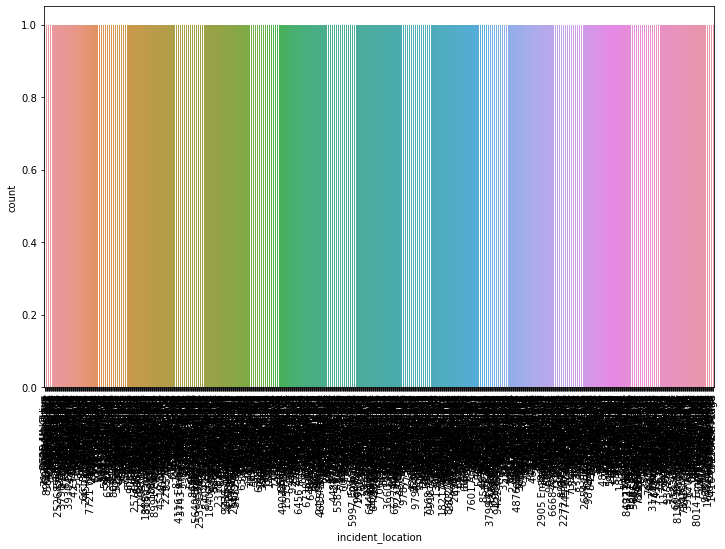



####################################################################################################


In [370]:
#Categorical column
i=24 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

we don't need "incident_location" column.so,we drop it.

In [371]:
#append "incident_location" column in drop_columns list
drop_columns.append("incident_location")

column Name: incident_hour_of_the_day


17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64
len= 24


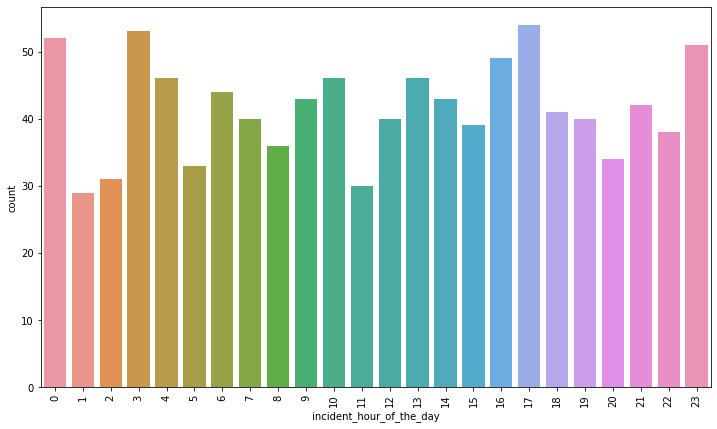



####################################################################################################


In [372]:
#Categorical column
i=25 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: number_of_vehicles_involved


1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
len= 4


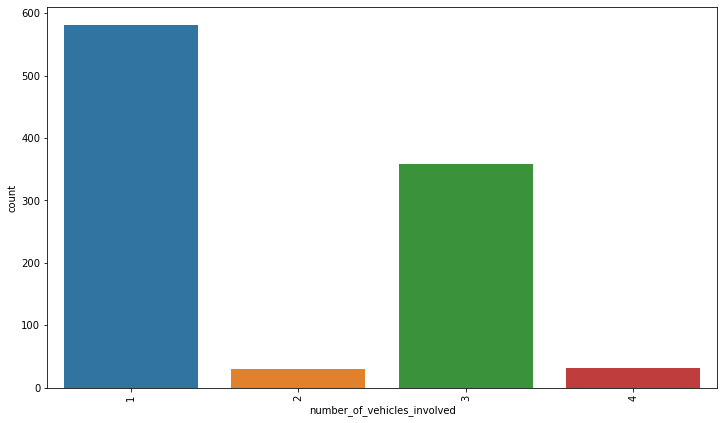



####################################################################################################


In [373]:
#Categorical column
i=26 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

most of the case the number of involved vechical is 1 or 3

column Name: property_damage


?      360
NO     338
YES    302
Name: property_damage, dtype: int64
len= 3


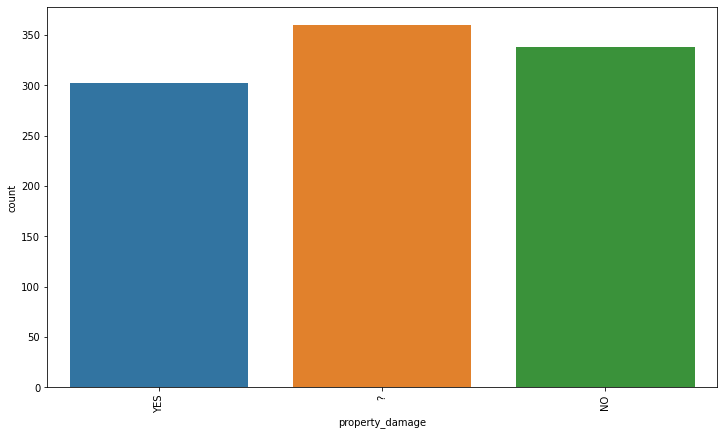



####################################################################################################


In [374]:
#Categorical column
i=27 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: bodily_injuries


0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
len= 3


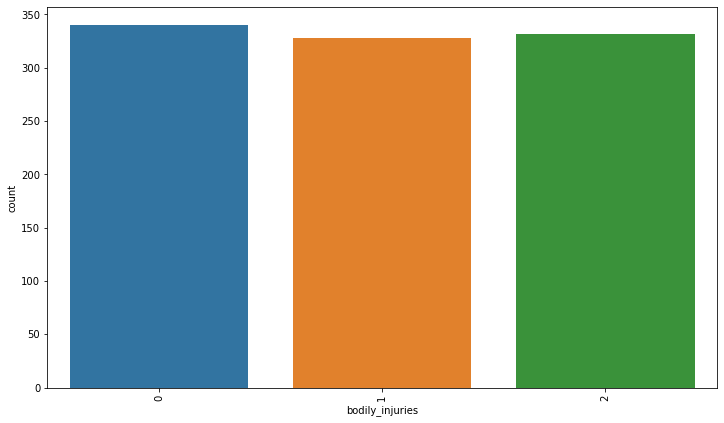



####################################################################################################


In [375]:
#Categorical column
i=28 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: witnesses


1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64
len= 4


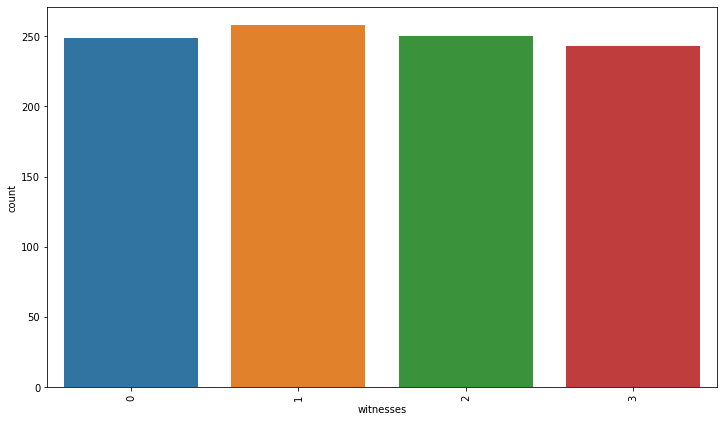



####################################################################################################


In [376]:
#Categorical column
i=29 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: police_report_available


NO     343
?      343
YES    314
Name: police_report_available, dtype: int64
len= 3


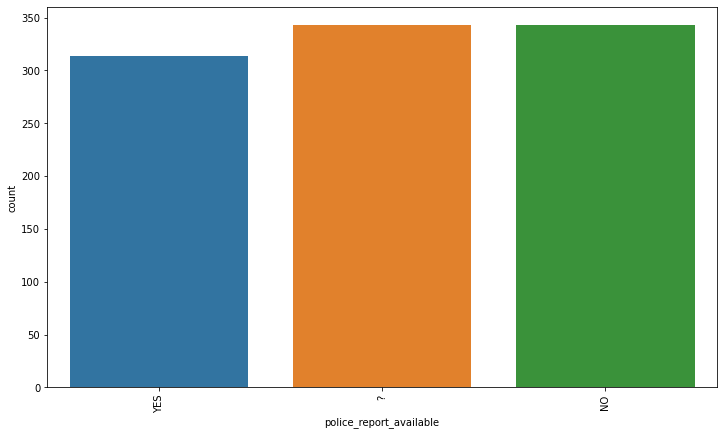



####################################################################################################


In [377]:
#Categorical column
i=30 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: total_claim_amount


59400    5
2640     4
75400    4
60600    4
5940     4
        ..
51590    1
31700    1
53640    1
63100    1
88920    1
Name: total_claim_amount, Length: 763, dtype: int64
len= 763


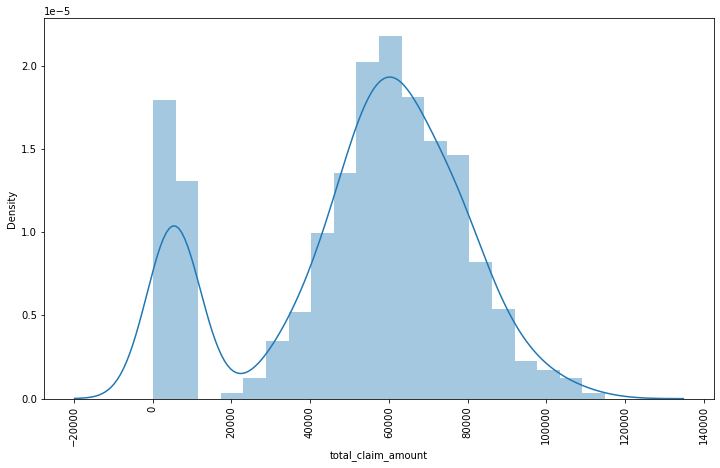



####################################################################################################


In [378]:
#Numerical column
i=31 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

The curve is like normal distribution curve

column Name: injury_claim


0        25
640       7
480       7
1180      5
860       5
         ..
10800     1
12580     1
6700      1
4650      1
16500     1
Name: injury_claim, Length: 638, dtype: int64
len= 638


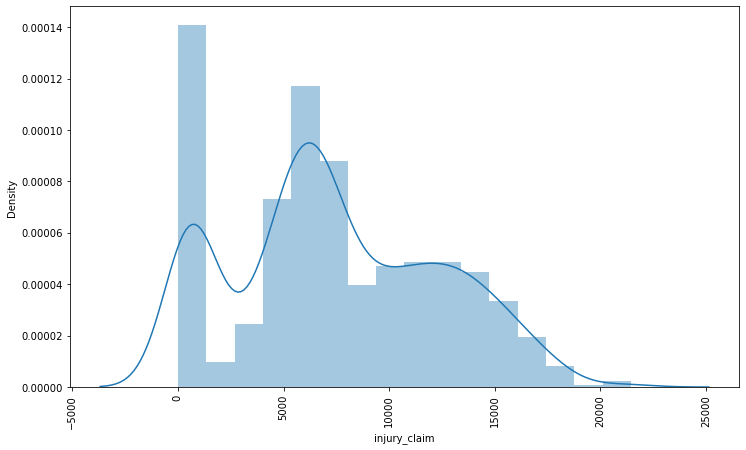



####################################################################################################


In [379]:
#Numerical column
i=32 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

we can see that tail of the distribution cuve belongs in right side,positive skewness is present in the above columns data.

column Name: property_claim


0        19
860       6
640       5
480       5
10000     5
         ..
5350      1
6700      1
20550     1
4650      1
11260     1
Name: property_claim, Length: 626, dtype: int64
len= 626


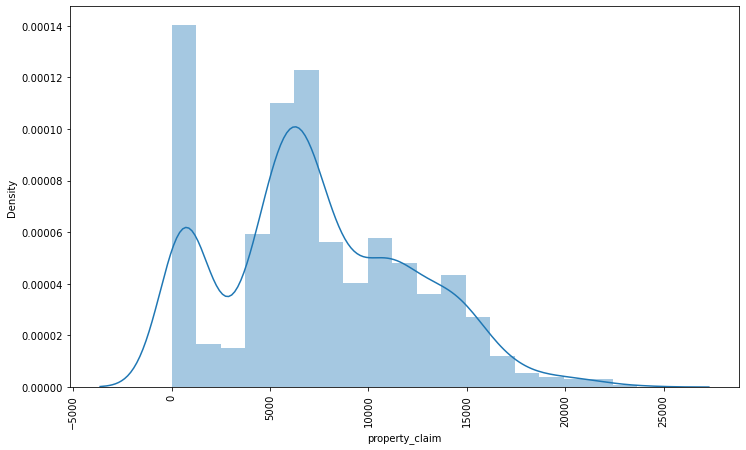



####################################################################################################


In [381]:
#Numerical column
i=33 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

curve is not like normal distribution curve

column Name: vehicle_claim


5040     7
3360     6
52080    5
44800    5
4720     5
        ..
46480    1
38290    1
5520     1
26720    1
22800    1
Name: vehicle_claim, Length: 726, dtype: int64
len= 726


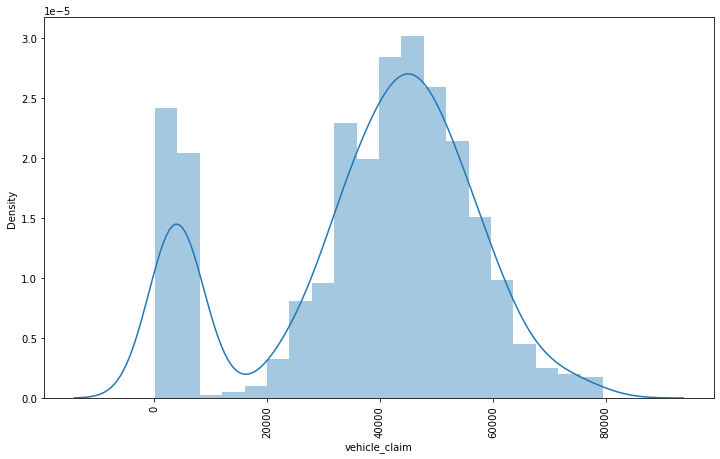



####################################################################################################


In [382]:
#Numerical column
i=34 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: auto_make


Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
len= 14


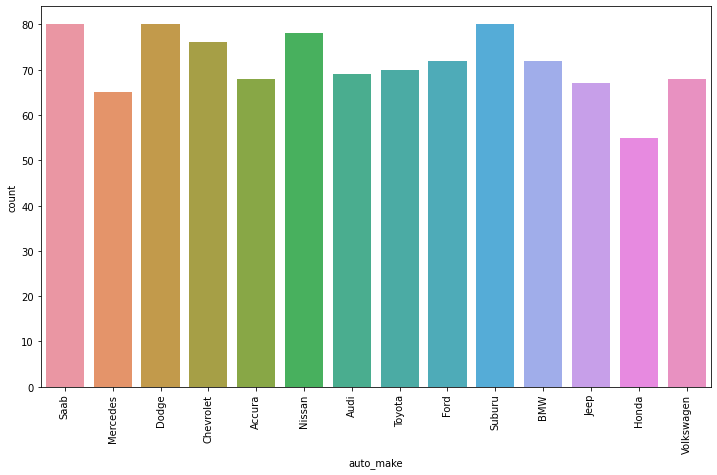



####################################################################################################


In [383]:
#Categorical column
i=35 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: auto_model


RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
F150              27
E400              27
95                27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
X5                23
Ultima            23
Civic             22
Highlander        22
Silverado         22
Fusion            21
TL                20
CRV               20
Corolla           20
ML350             20
Impreza           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64
len= 39


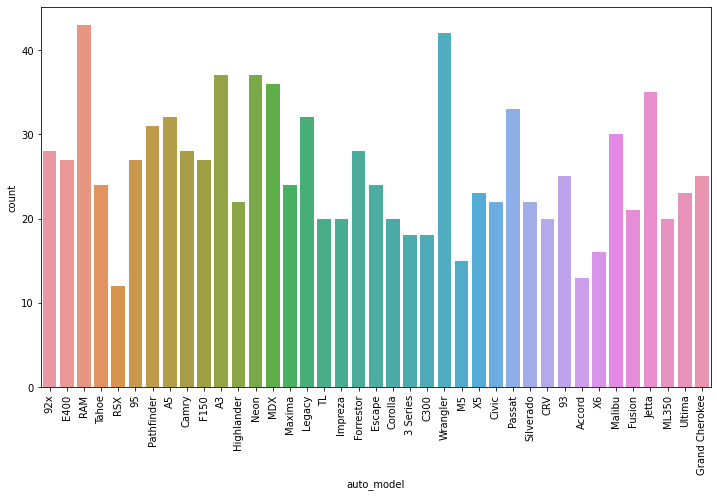



####################################################################################################


In [384]:
#Categorical column
i=36 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: auto_year


1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64
len= 21


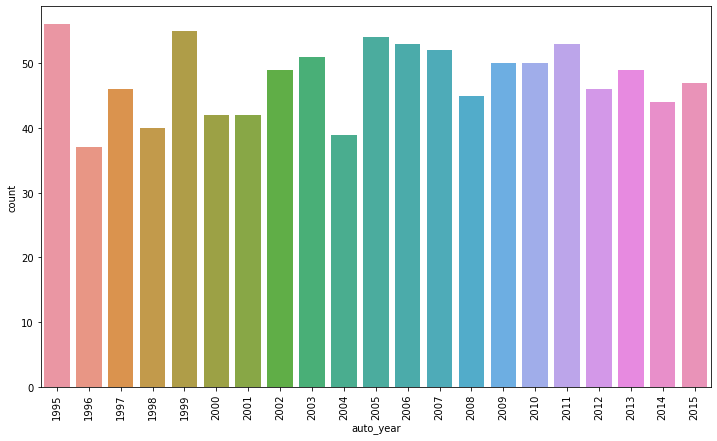



####################################################################################################


In [385]:
#Categorical column
i=37 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

column Name: fraud_reported


N    753
Y    247
Name: fraud_reported, dtype: int64
len= 2


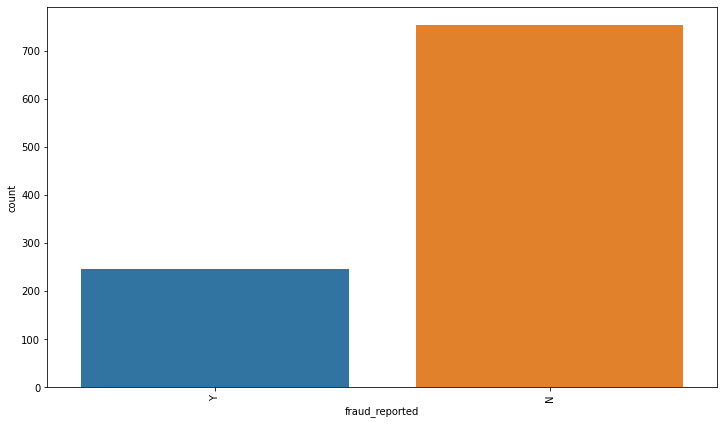



####################################################################################################


In [386]:
#Categorical column
i=38 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*100)

This is our Target columm.                                                         
we can see that the number of yes less than number of No in our target column.                                  
so the calss of target column is imbalnced

# Bivariate Analysis:

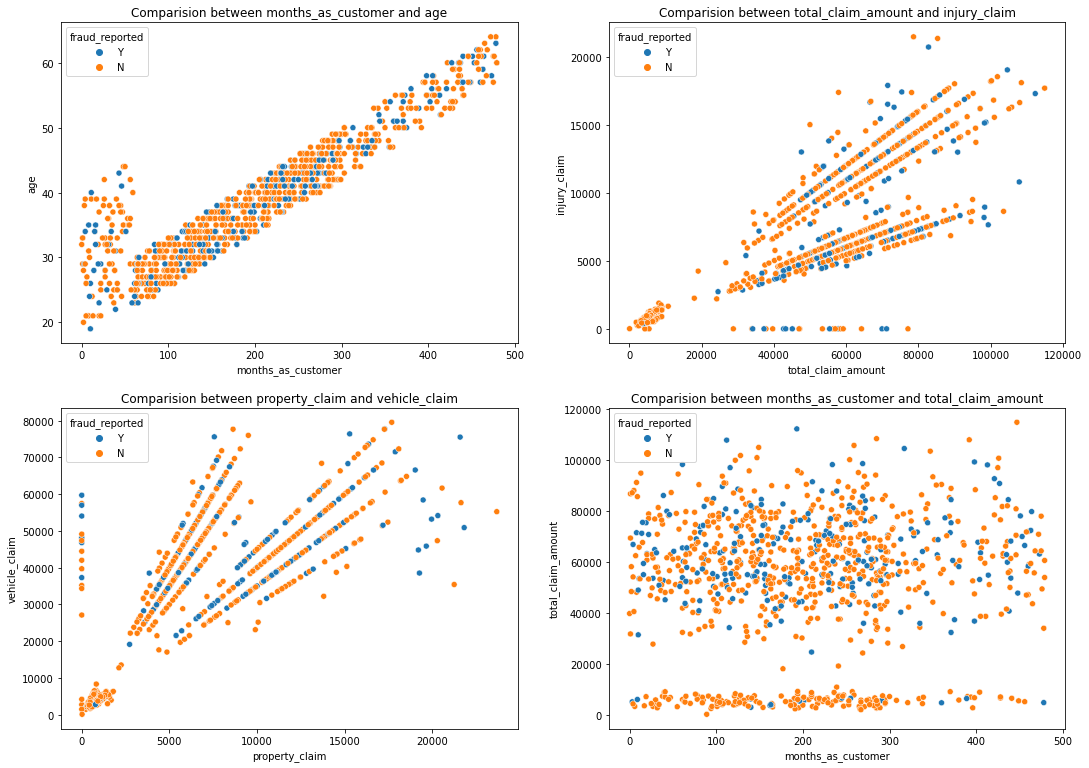

In [487]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between months_as_customer and age')
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported']);

plt.subplot(2,2,2)
plt.title('Comparision between total_claim_amount and injury_claim')
sns.scatterplot(df['total_claim_amount'],df['injury_claim'],hue=df['fraud_reported']);

plt.subplot(2,2,3)
plt.title('Comparision between property_claim and vehicle_claim')
sns.scatterplot(df['property_claim'],df['vehicle_claim'],hue=df['fraud_reported']);

plt.subplot(2,2,4)
plt.title('Comparision between months_as_customer and total_claim_amount')
sns.scatterplot(df['months_as_customer'],df['total_claim_amount'],hue=df['fraud_reported']);


1.There is a positive linear relation between age and month_as_customer column. As age increases the month_as customers also increases, also the fraud reported is very less in htis case.                       
                                                   
2.In the second graph we cna observe the positive linear relation, as total cliam amount increases, injury claim is also increases.                                      
                                                            
3.Third plot is also same as second one that is as the property claim increases, vehicle claim is also increases.
                                                                           
4.In the fourth plot we can observe the data is scattered and there is no much relation between the features.

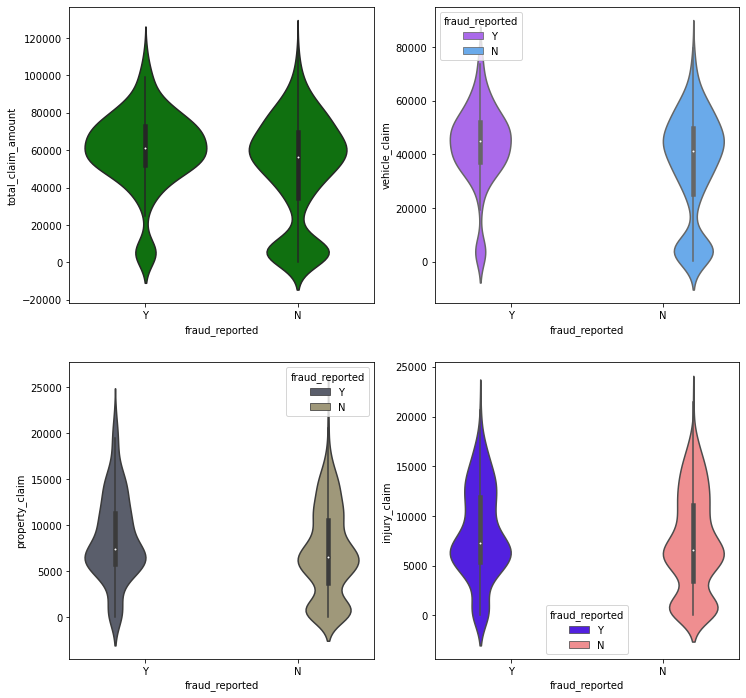

In [493]:
fig,axes=plt.subplots(2,2,figsize=(12,12))

# Comparing insured_sex and age
sns.violinplot(x='fraud_reported',y='total_claim_amount',ax=axes[0,0],data=df,color="g")

# Comparing policy_state and witnesses
sns.violinplot(x='fraud_reported',y='vehicle_claim',ax=axes[0,1],data=df,hue="fraud_reported",palette="cool_r")

# Comparing csl_per_accident and property_claim
sns.violinplot(x='fraud_reported',y='property_claim',ax=axes[1,0],data=df,hue="fraud_reported",palette="cividis")

# Comparing csl_per_person and age
sns.violinplot(x='fraud_reported',y='injury_claim',ax=axes[1,1],data=df,hue="fraud_reported",palette="gnuplot2")
plt.show()

In [494]:
#Most of the fraud reports found when the total claimed amount is 5000-70000.

#The fraud report is high when the claimed vehicle is between 3700-5900.

#The frad reports is high when the property claimed is between 5200-8500.

#Most fraud reported when injury claim are between 5000 to 8000.

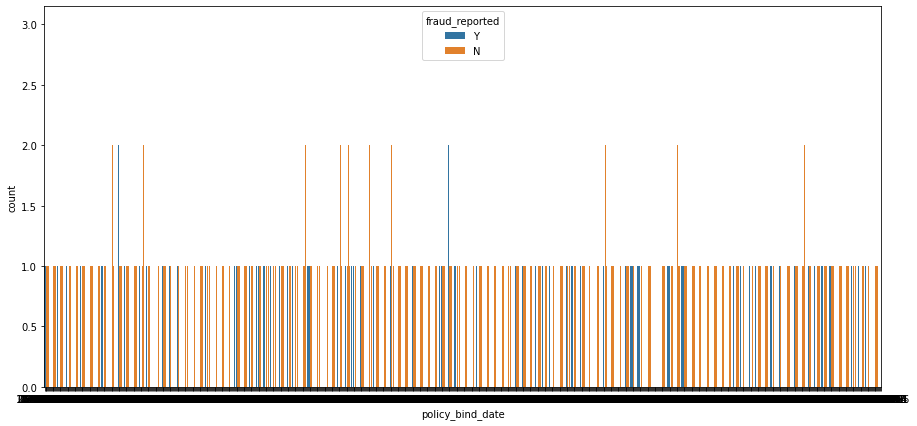

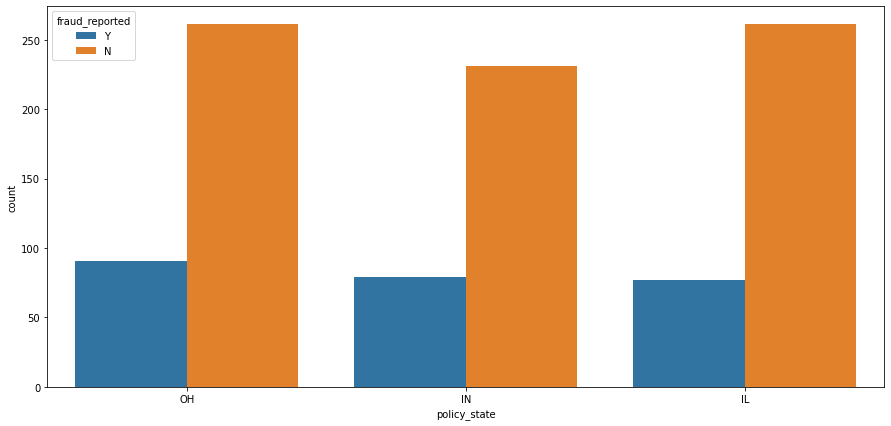

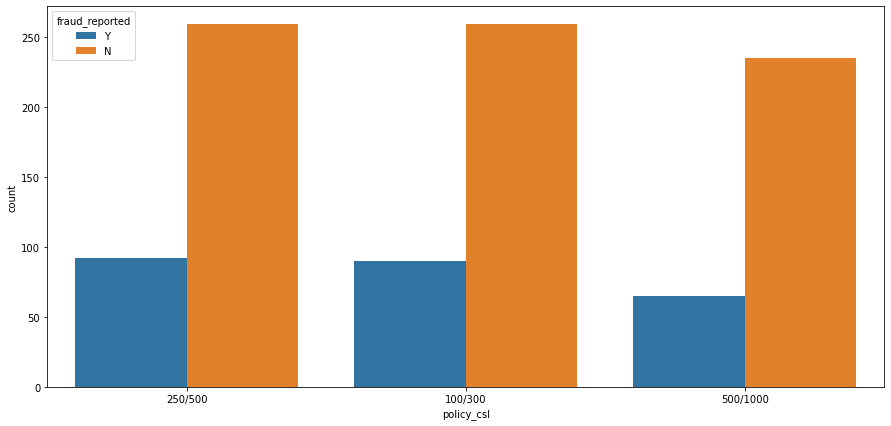

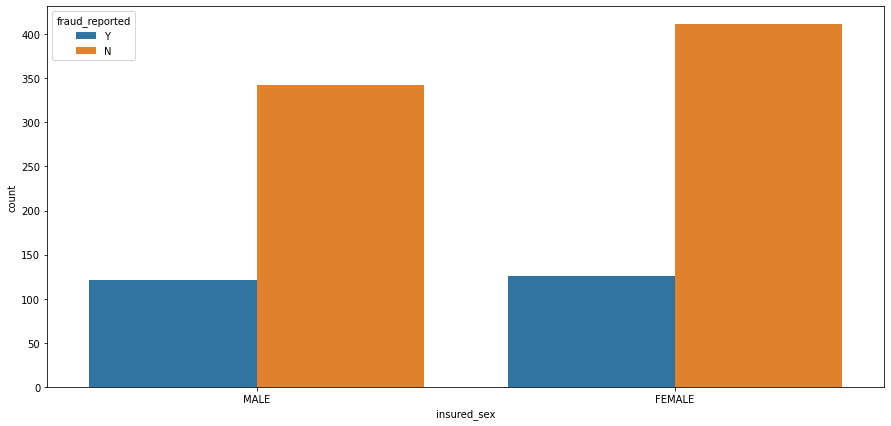

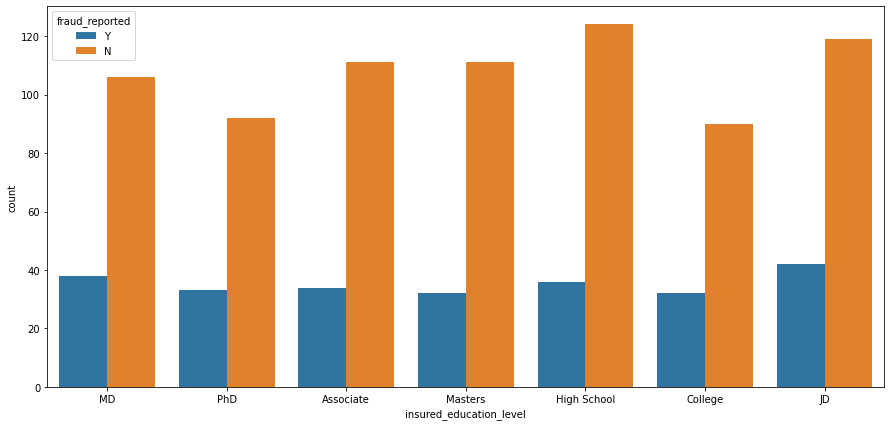

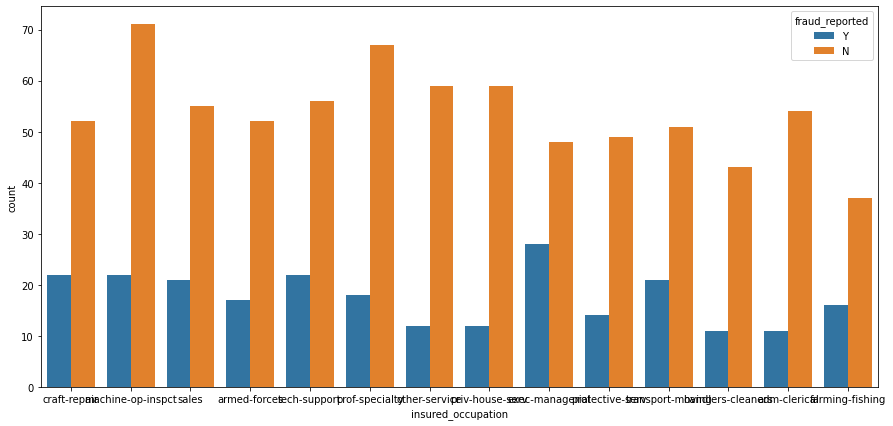

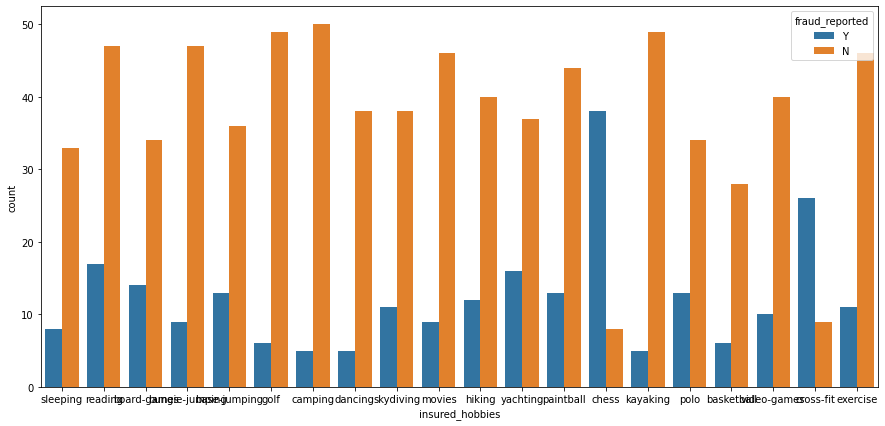

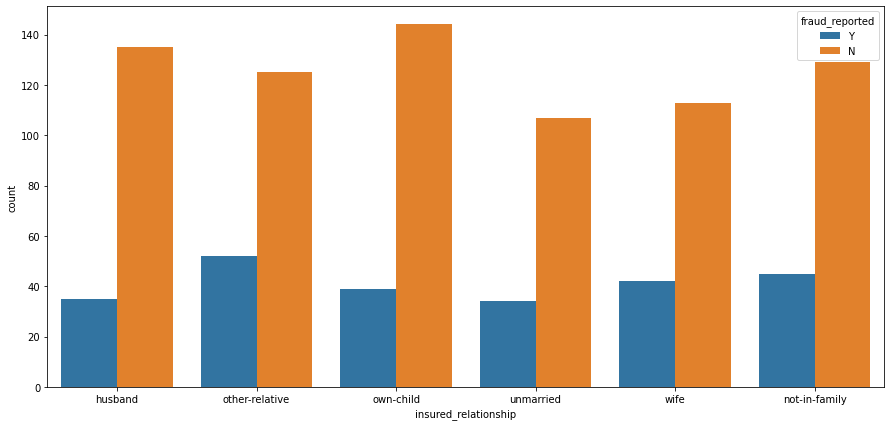

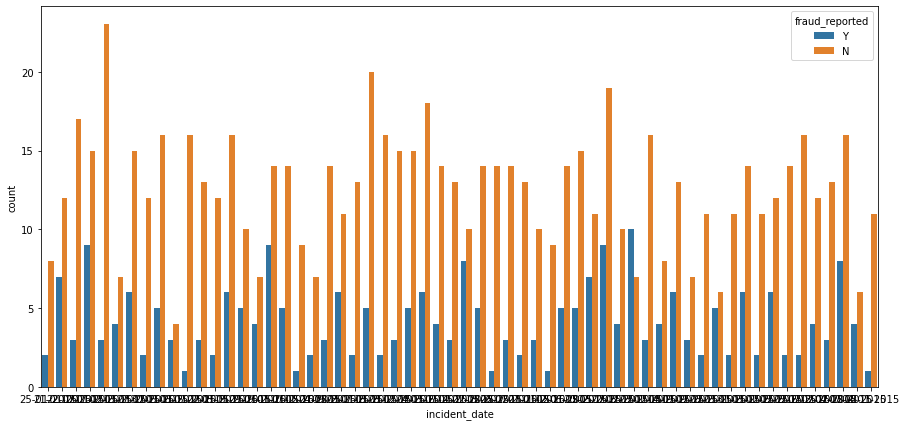

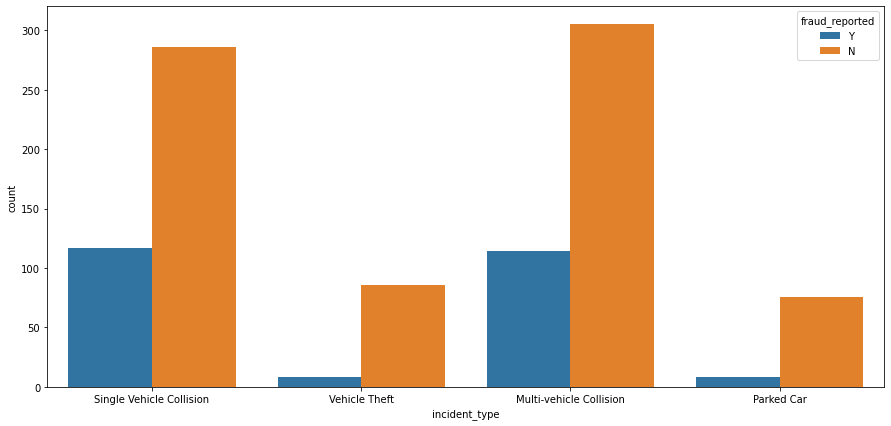

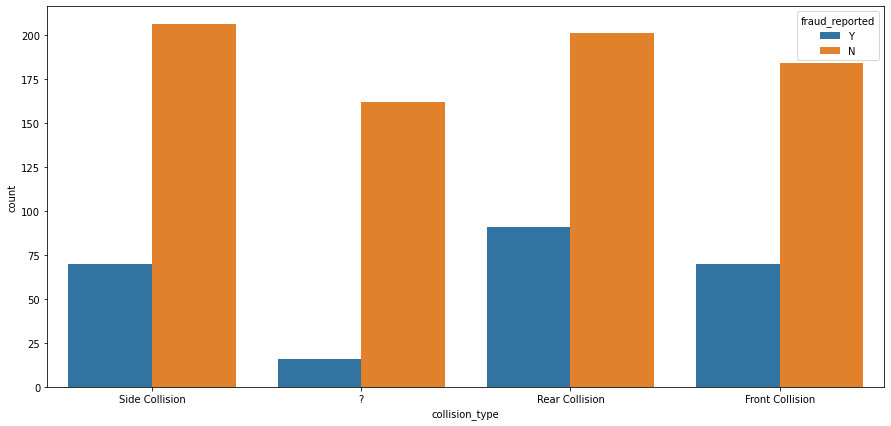

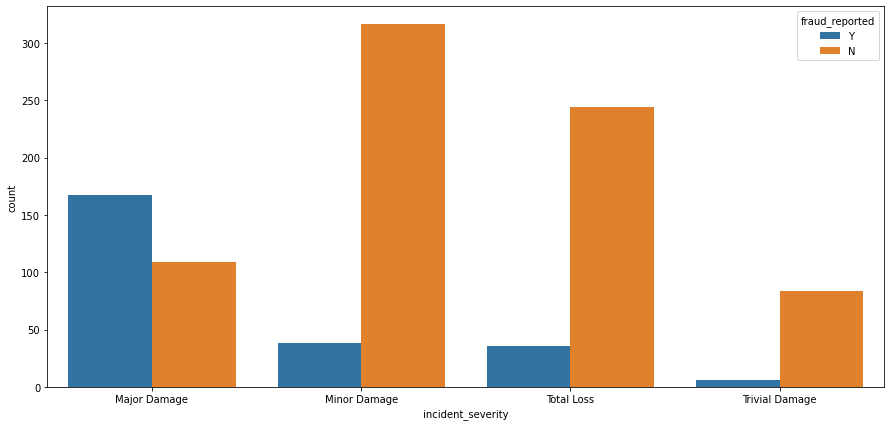

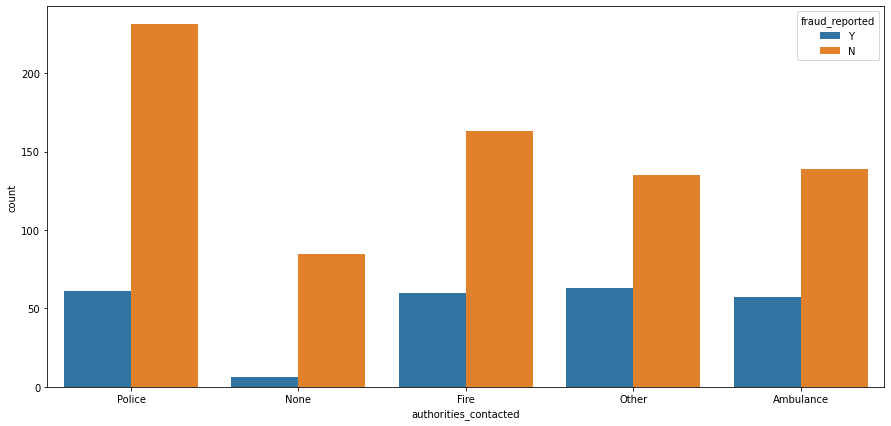

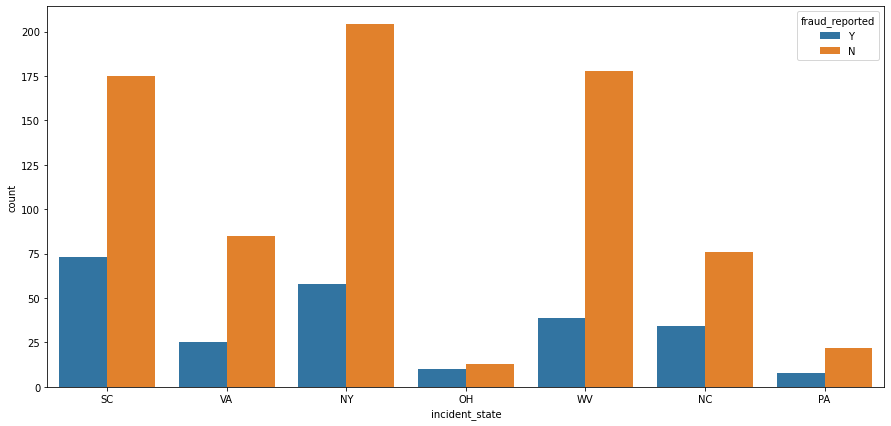

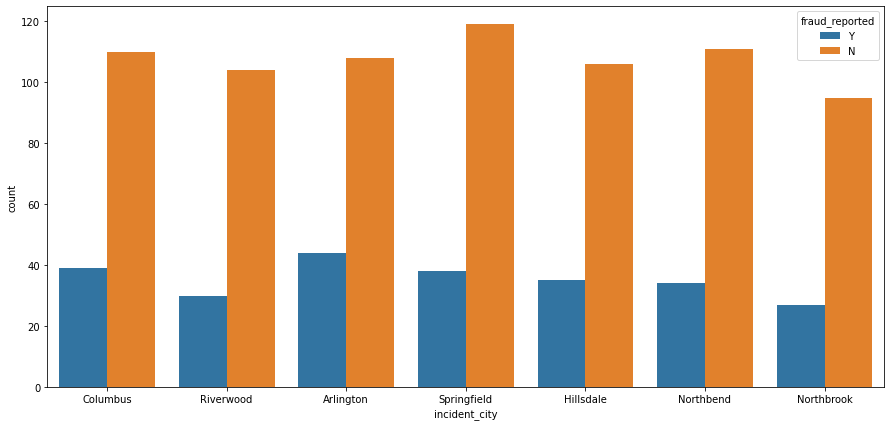

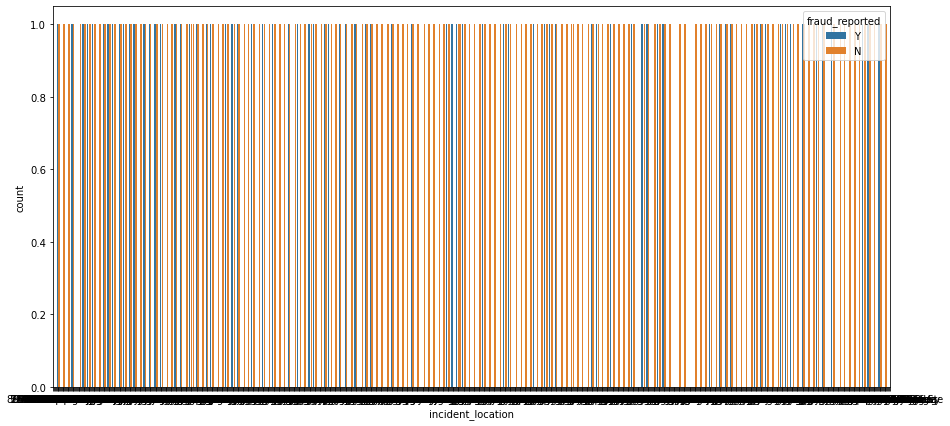

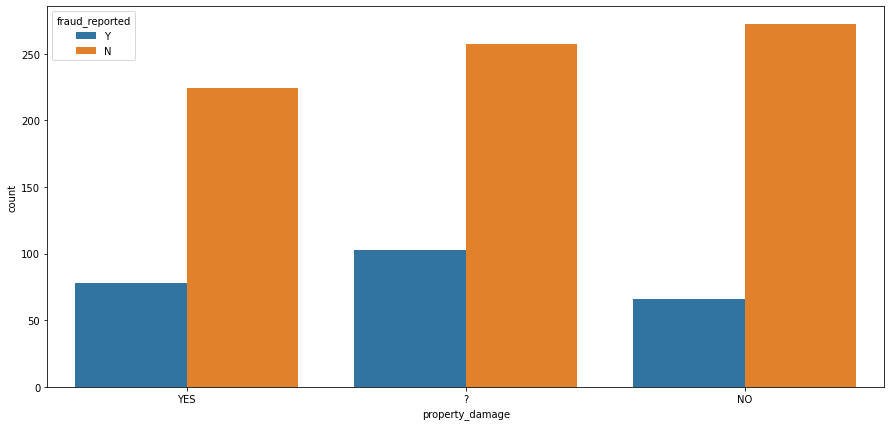

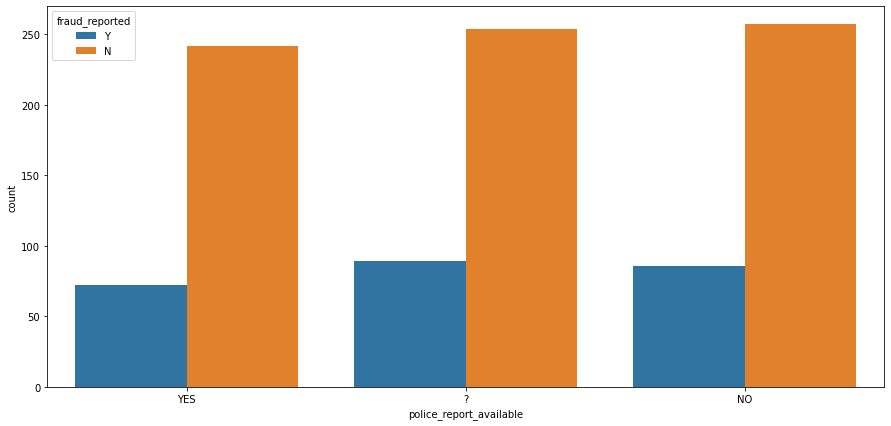

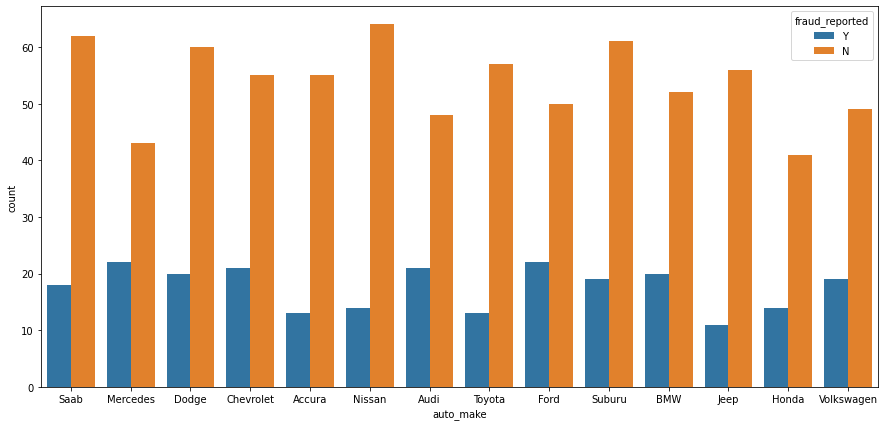

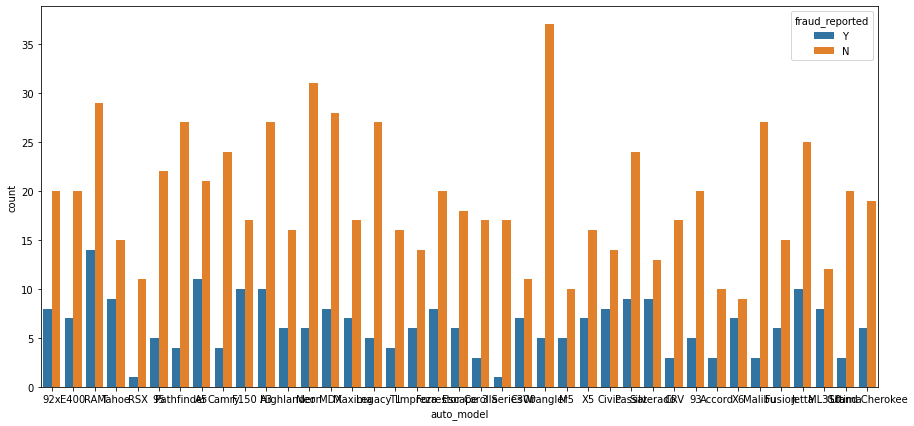

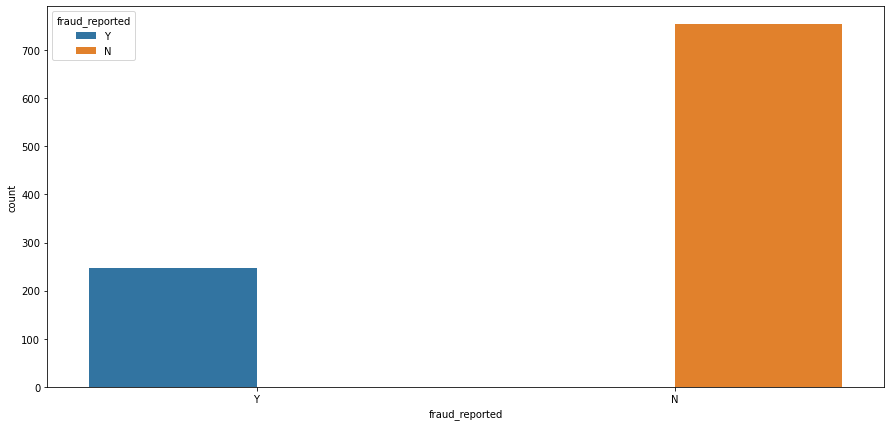

In [510]:
for i in categorical_columns:
    plt.figure(figsize=(15,7))
    sns.countplot(x=i,hue='fraud_reported',data=df)

incident_city: In all cities fraud reported counts are almost same.
                                                                                                 
incident_state:Most of the fraud reported were fonund where incident state was SC, NY, OH, NC and PA
                                                                                                                             
authorities_contacted:Most of the fraud founded where cx have contacted authorities_contacted of Fire, Other and Ambulance
                                                                                                  
incident_severity:Most of fraud reported claim are Major Damage , most of them are counted as fraud
                                                                                                                
collision_type:Most of fraud reported claims in Side Collision, Rear Collision and Front Collision.
                                                                                            
incident_type:We have most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type.
                                                                                  
insured_relationship:According to the data info, cx those having insured relationship with other relative and wife are most reported than others.
                                                                                        
insured_hobbies:Here we can see the cx those hobbies are Chess, are most fraud reported cx.
                                                                                              
insured_education_level:We higher cx those are education level is High School and least cx in PhD and College
There is very little difference in fraud report in all kind of cx
Fraud report is little higher in cx those education level is JD, MD, PhD, and College than others.
                                                                                                         
insured_sex:We have more cx in Female than the Male
But fraud reported is little high Male cx



# Multivariate Analysis:

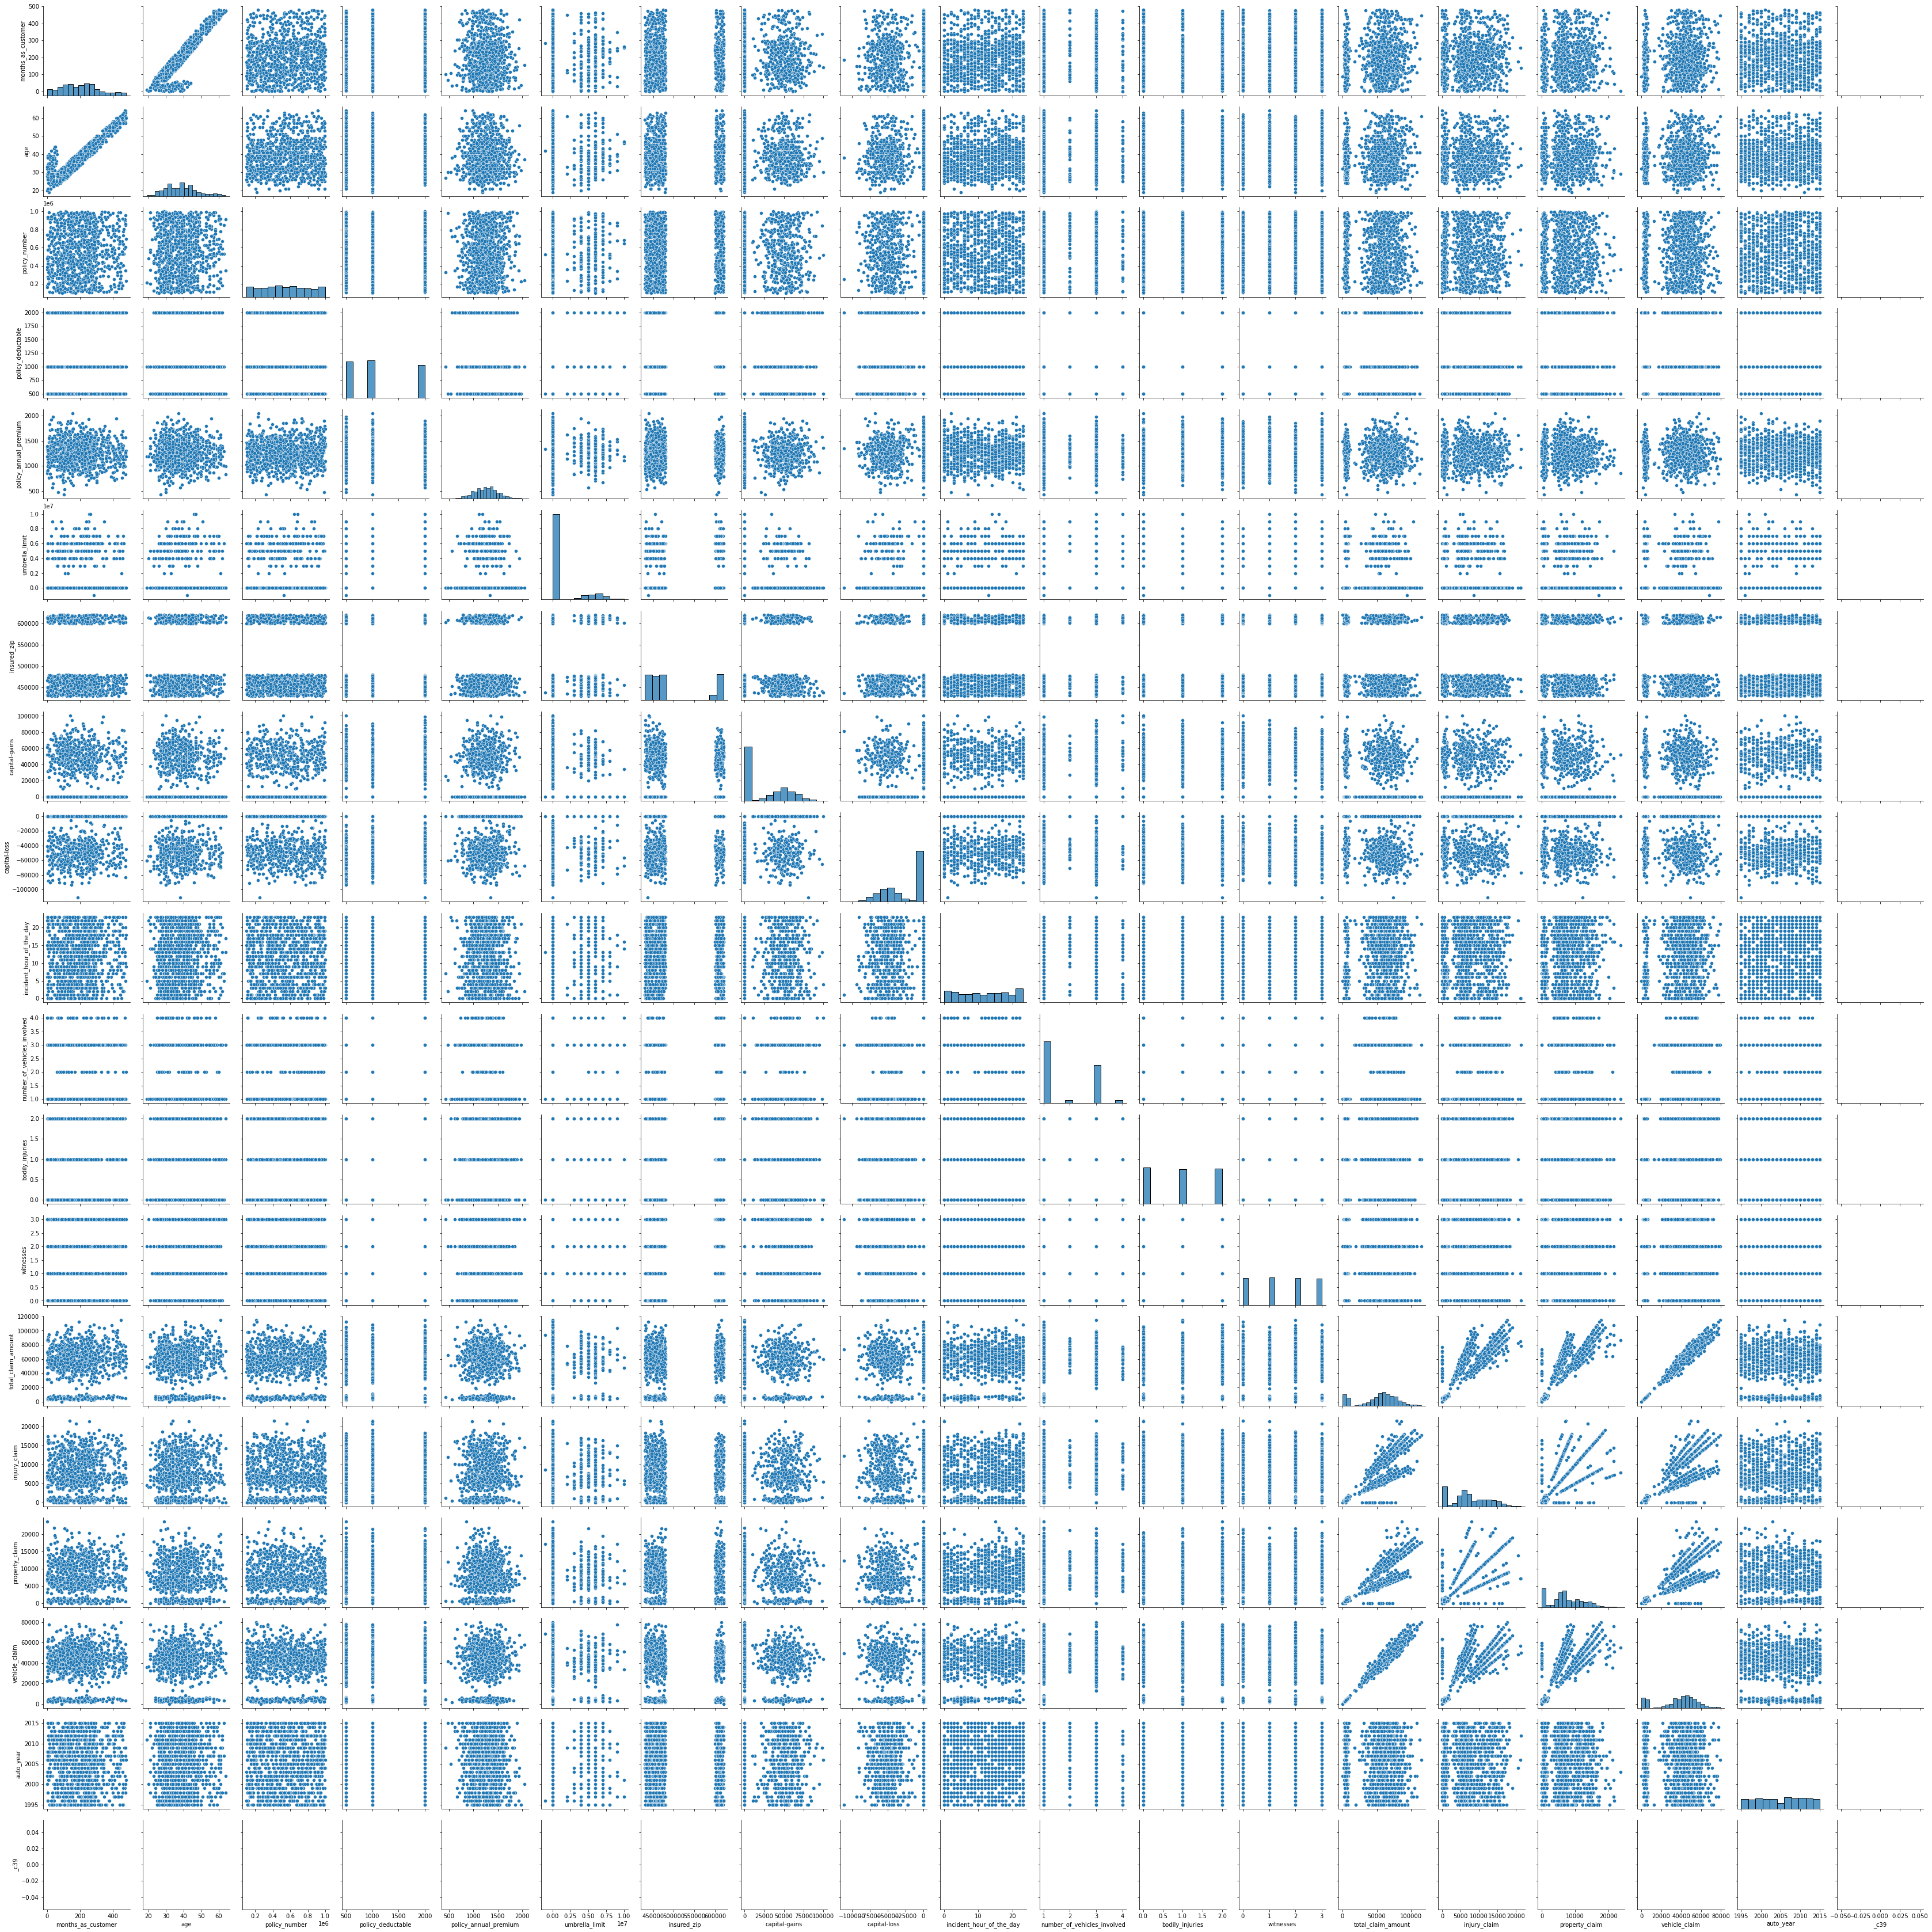

In [491]:
sns.pairplot(df)

Since the number of columns is too large, we cannot see the name of the column correctly.                                   
                                                                                                    
we see that many pair have strongly related to each other and some pair have no relation to each other.

#Now we drop the Unnecessary columns which i stored in drop_columns list

In [387]:
#drop the unnecessary columns
df=df.drop(drop_columns,axis=1)

In [388]:
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... vehicle_claim   auto_make  \
0                        MD       craft-repair  ...         52080        Saab   
1                        MD  machine-op-inspct  ...          3510    Mercedes   
2                       PhD              sales  ...         23100       Dodge   
3                       PhD       armed-forces  ...         50720   Chevrolet   
4                 Associate              sales  ...          4550      Accura   
..                      ...                ...  ...           ...         ...   
995                 Masters       craft-repair  ...         61040       Honda   
996                     PhD     prof-specialty  ...         72320  Volkswagen   
997                 Masters       armed-forces  ...         52500      Suburu   
998               Associate  handlers-cleaners  ...         36540        Audi   
999               Associate              sales  ...          3680    Mercedes   

     auto_model  auto_year fraud_reported policy_bind_day policy_bind_month  \
0           92x       2004              Y              17                10   
1          E400       2007              Y              27                 6   
2           RAM       2007              N               9                 6   
3         Tahoe       2014              Y              25                 5   
4           RSX       2009              N               6                 6   
..          ...        ...            ...             ...               ...   
995      Accord       2006              N              16                 7   
996      Passat       2015              N               1                 5   
997     Impreza       1996              N              17                 2   
998          A5       1998              N              18                11   
999        E400       2007              N              11                11   

    policy_bind_year incident_day incident_month  
0               2014           25              1  
1               2006           21              1  
2               2000           22              2  
3               1990            1             10  
4               2014           17              2  
..               ...          ...            ...  
995             1991           22              2  
996             2014           24              1  
997             2003      

In [389]:
#checking shape of the Dataframe
df.shape

(1000, 39)

we have 39 columns and 1000 rows

In [ ]:
New added columns name:
    1.policy_bind_day
    2.policy_bind_month
    3.policy_bind_year
    4.incident_day
    5.incident_month

In [390]:
#Describing the Dataset
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
policy_bind_day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_month               1000.0  3.407000e+00  3.276291e+00        1.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
capital-gains                    0.0000      0.0  51025.000    100500.00  
capital-loss                -51500.0000 -23250.0      0.000         0.00  
incident_hour_of_the_day         6.0000     12.0     17.000        23.00  
number_of_vehicles_involved      1.0000      1.0      3.000         4.00  
bodily_injuries                  0.0000      1.0      2.000         2.00  
witnesses                        1.0000      1.0      2.000         3.00  
total_claim_amount           41812.5000  58055.0  70592.500    114920.00  
injury_claim                  4295.0000   6775.0  11305.000     21450.00  
property_claim                4445.0000   6750.0  10885.000     23670.00  
vehicle_claim                30292.5000  42100.0  50822.500     79560.00  
auto_year                     2000.0000   2005.0   2010.000      2015.00  
policy_bind_day                  8.0000     16.0     23.000        31.00  
policy_bind_month                4.0000      7.0      9.000        12.00  
policy_bind_year              1995.0000   2002.0   2008.000      2015.00  
incident_day                     2.0000     15.0     22.000        31.00  
incident_month                   1.0000      2.0      5.000        12.00

In [391]:
#Checking Correlation
df.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   
policy_bind_day                        0.051728  0.053869           0.009164   
policy_bind_month                      0.005750  0.015501          -0.050416   
policy_bind_year                      -0.048276 -0.037444          -0.049598   
incident_day                          -0.011092 -0.006131          -0.018160   
incident_month                         0.024659  0.023404          -0.006418   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
incident_hour_of_the_day                 -0.001578       -0.023257   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
auto_year                                -0.049226        0.009893   
policy_bind_day                          -0.025183       -0.045207   
policy_bind_month                        -0.035355        0.009961   
policy_bind_year                          0.001249        0.048008   
incident_day                              0.014835       -0.021716   
incident_month                            0.021559        0.042409   

                             capital-gains  capital-loss  \
months_as_customer                0.006399      0.020209   
age                              -0.007075      0.007368   
policy_deductable                 0.035212     -0.023544   
policy_annual_premium            -0.013738      0.023547   
umbrella_limit                   -0.047268     -0.024056   
capital-gains                     1.000000     -0.046904   
capital-loss                     -0.046904      1.000000   
incident_hour_of_the_day         -0.016406     -0.025054   
number_of_vehicles_involved       0.061643     -0.014895   
bodily_injuries                   0.055829     -0.024418   
witnesses                        -0.017651     -0.041330   
total_c

we can see the correlation between each and every columns.

<AxesSubplot:>

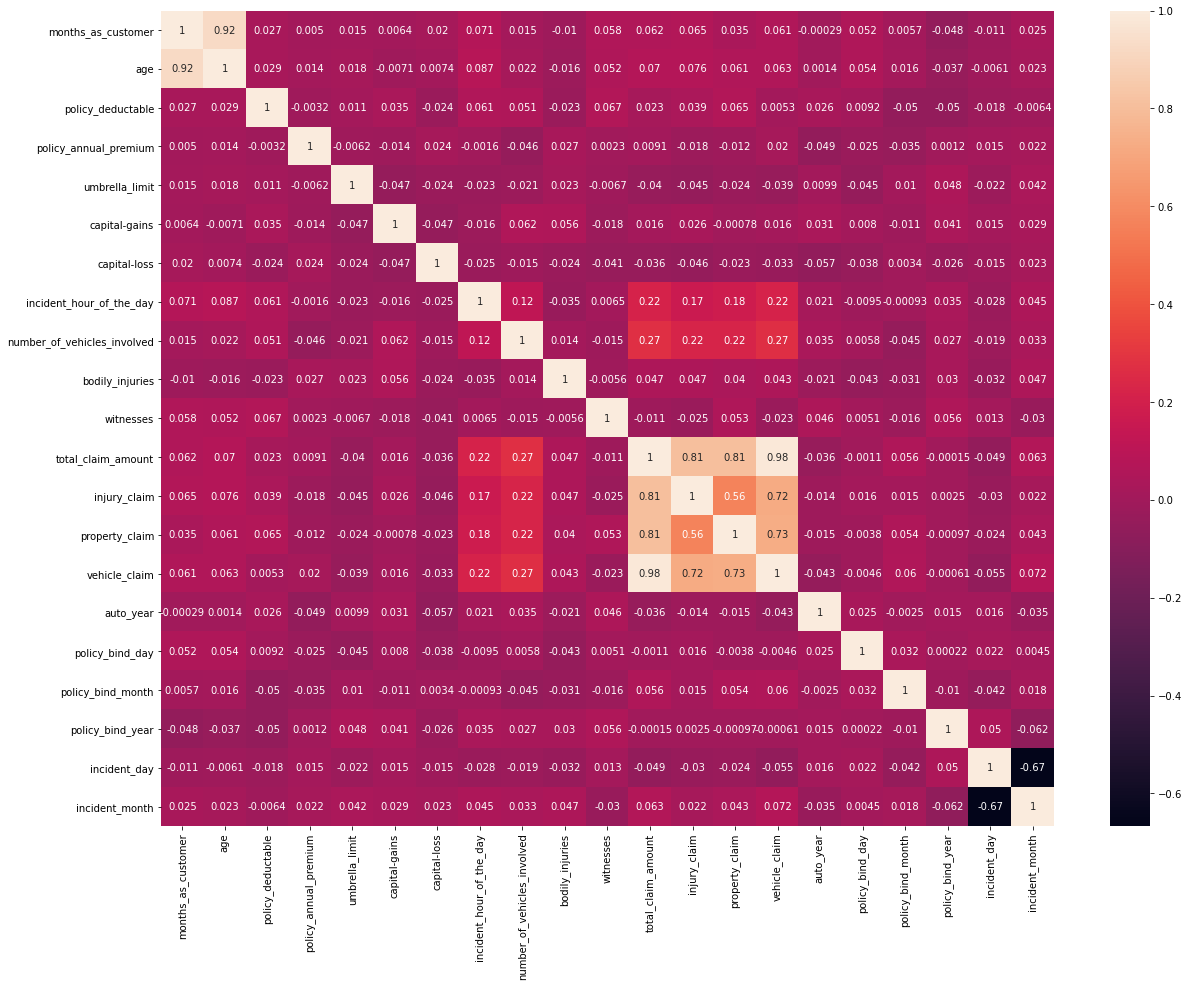

In [392]:
#checking corrleation using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

now we can better visualize the corrlation between each and every columns

In [393]:
#checking skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
dtype: float64

very less columns present skewness above 0.5

# Checking Outliers:

In [397]:
# now checking for numerical columns
numerical_columns_o=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns_o.append(i)
print(numerical_columns_o)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']


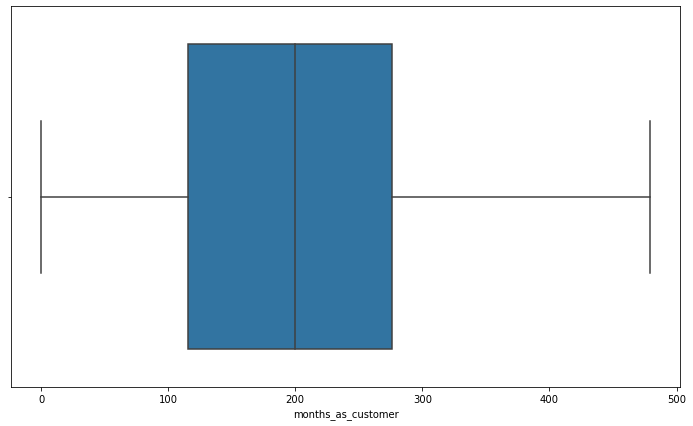



#############################################################################################################################
#############################################################################################################################




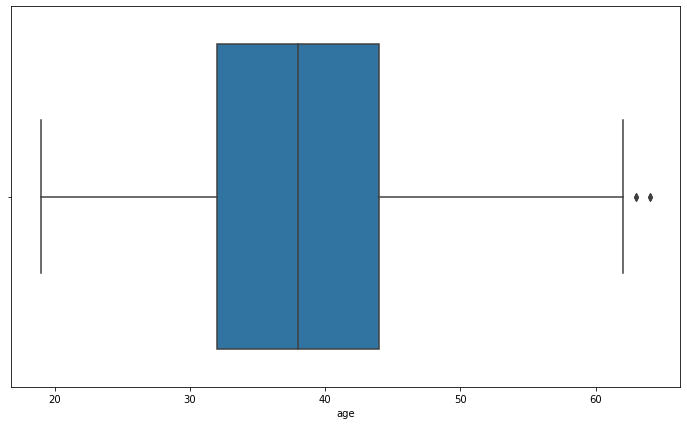



#############################################################################################################################
#############################################################################################################################




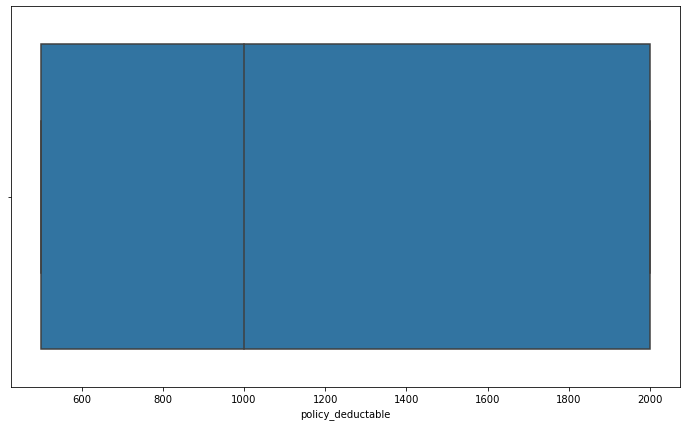



#############################################################################################################################
#############################################################################################################################




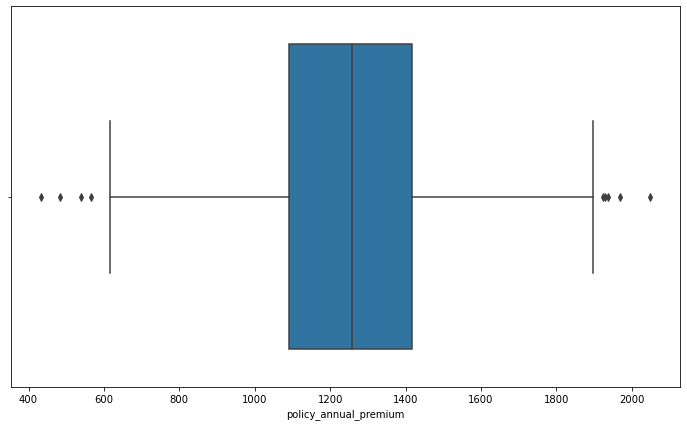



#############################################################################################################################
#############################################################################################################################




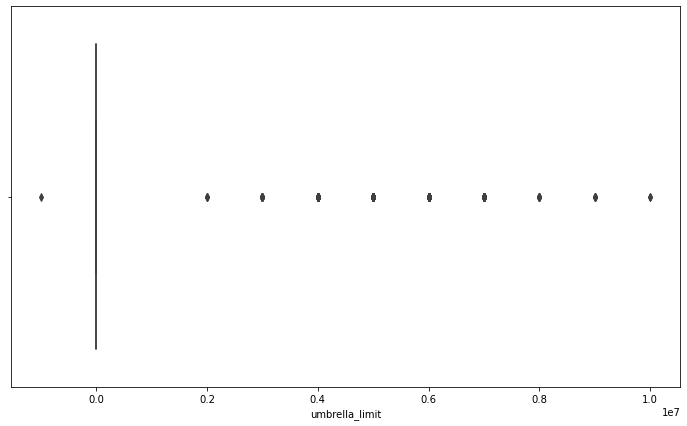



#############################################################################################################################
#############################################################################################################################




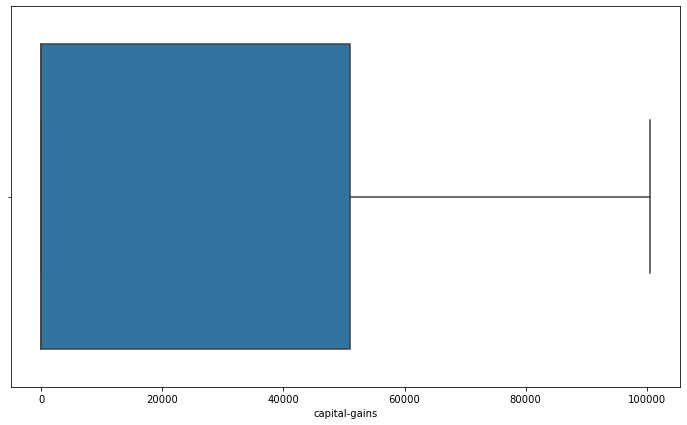



#############################################################################################################################
#############################################################################################################################




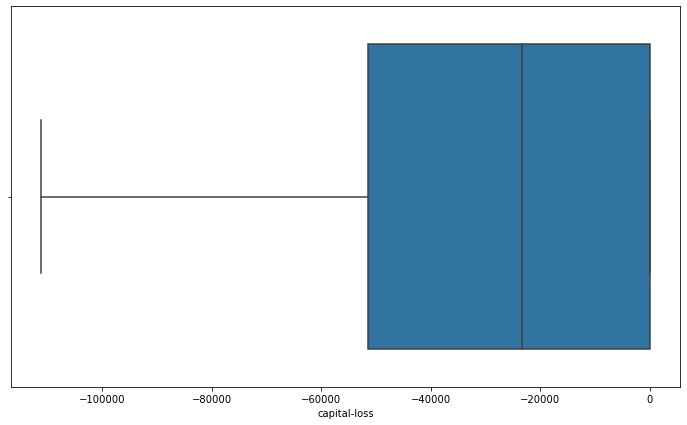



#############################################################################################################################
#############################################################################################################################




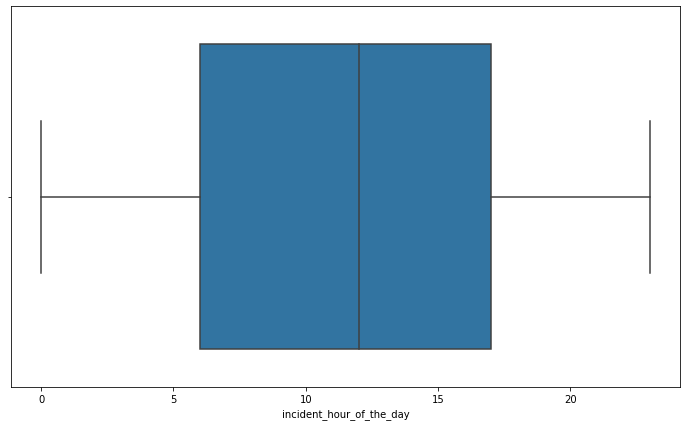



#############################################################################################################################
#############################################################################################################################




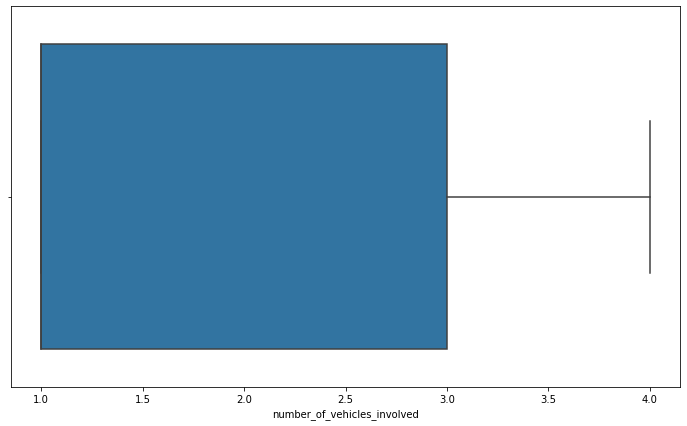



#############################################################################################################################
#############################################################################################################################




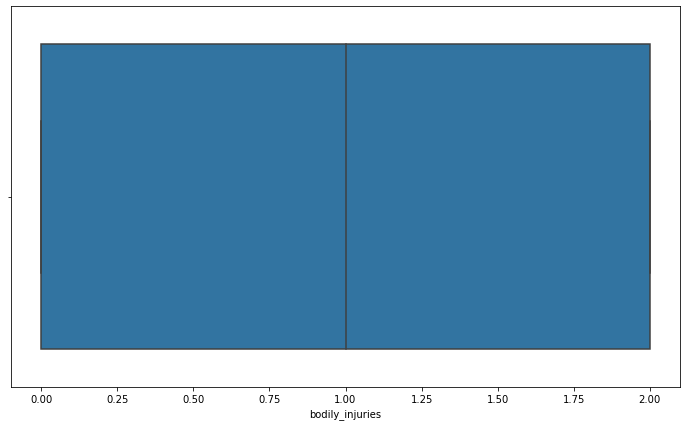



#############################################################################################################################
#############################################################################################################################




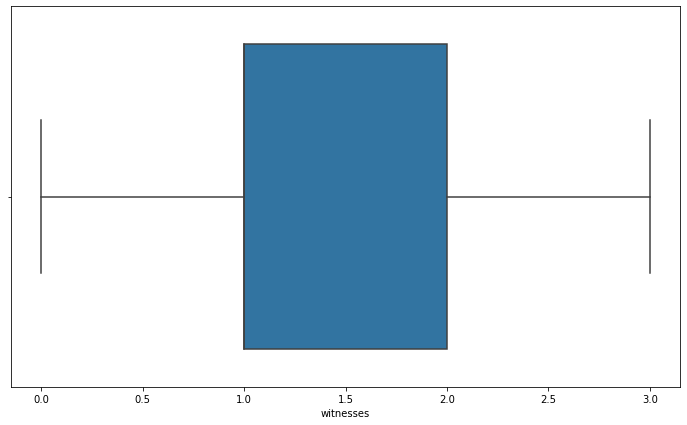



#############################################################################################################################
#############################################################################################################################




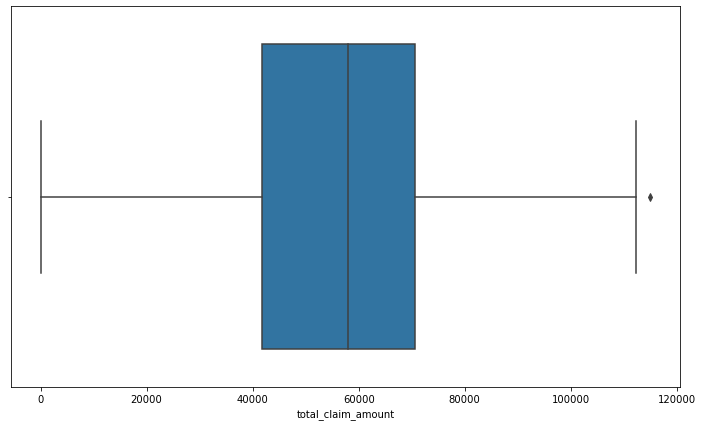



#############################################################################################################################
#############################################################################################################################




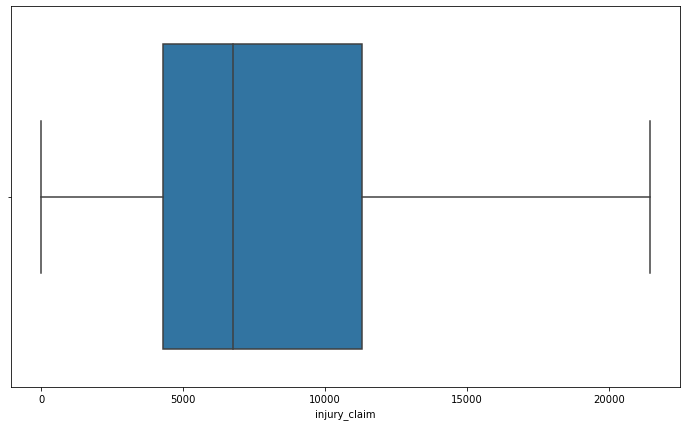



#############################################################################################################################
#############################################################################################################################




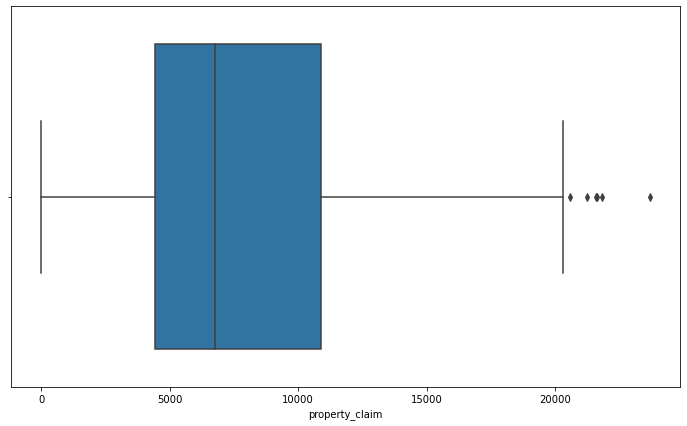



#############################################################################################################################
#############################################################################################################################




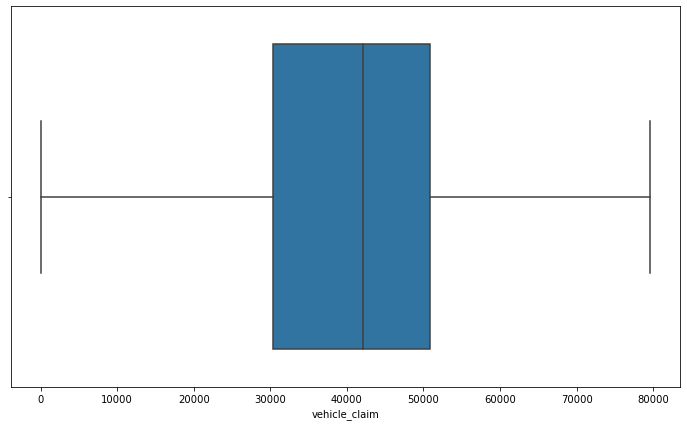



#############################################################################################################################
#############################################################################################################################




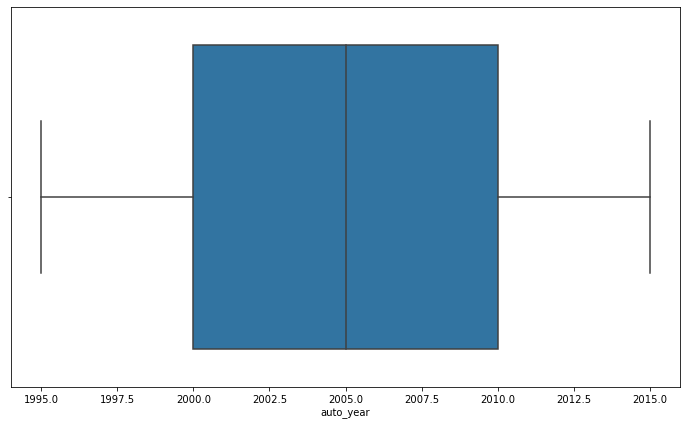



#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################




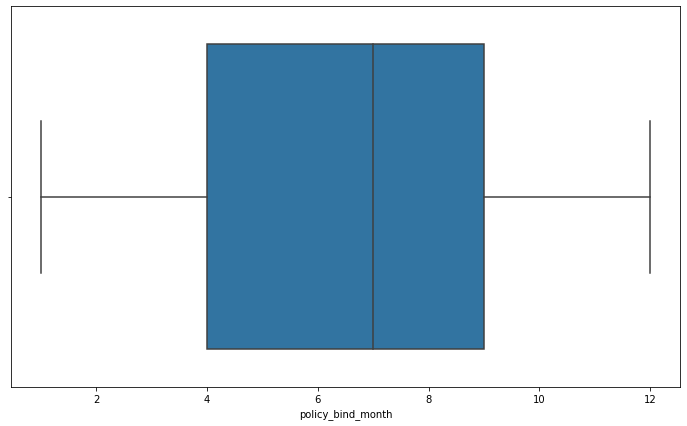



#############################################################################################################################
#############################################################################################################################




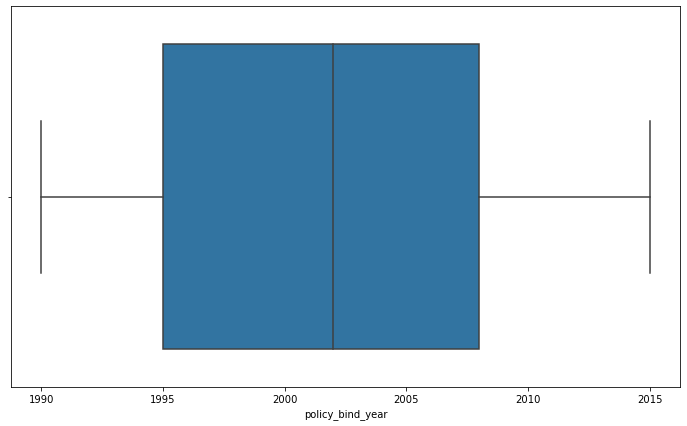



#############################################################################################################################
#############################################################################################################################




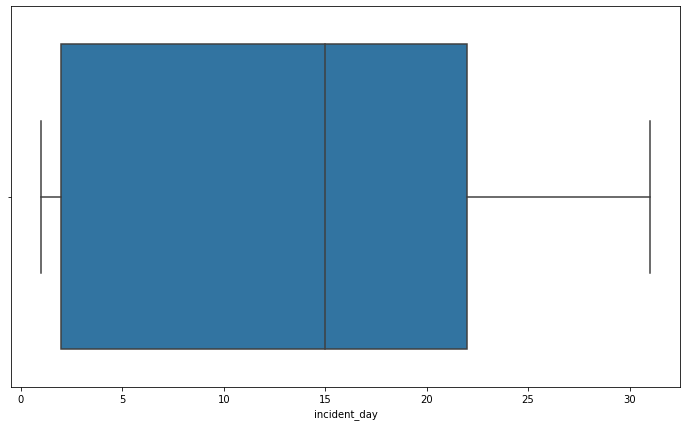



#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################




In [399]:
#Box plot of all Numerical Column
list_o=['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']
for i in list_o:
    plt.figure(figsize=(12,7))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*125)
    print("#"*125)
    print('\n')

# Remove The Outliers From The DataFrame By Zscore:

In [404]:
#import zscore
from scipy.stats import zscore
import numpy as np

In [405]:
outliers_columns=df[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']]

In [406]:
z=np.abs(zscore(outliers_columns))
z

array([[1.07813958, 0.99083647, 0.22238259, ..., 1.68499231, 1.14160272,
        0.73503976],
       [0.2089946 , 0.33407345, 1.41278352, ..., 0.59754971, 0.75838596,
        0.73503976],
       [0.60800168, 1.08891308, 1.41278352, ..., 0.21803224, 0.85419015,
        0.42966387],
       ...,
       [0.64276748, 0.54161057, 1.03996564, ..., 0.18975873, 0.94999434,
        0.73503976],
       [2.20802805, 2.52328351, 1.41278352, ..., 1.27720133, 1.23740691,
        0.42966387],
       [2.19064515, 2.3043625 , 0.22238259, ..., 0.76175354, 1.23740691,
        0.42966387]])

In [407]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 13,  4,  4,  4,  3,  6,
        4,  4,  4], dtype=int64))


In [408]:
df_new=df[(z<3).all(axis=1)]
df_new

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... vehicle_claim   auto_make  \
0                        MD       craft-repair  ...         52080        Saab   
1                        MD  machine-op-inspct  ...          3510    Mercedes   
2                       PhD              sales  ...         23100       Dodge   
3                       PhD       armed-forces  ...         50720   Chevrolet   
4                 Associate              sales  ...          4550      Accura   
..                      ...                ...  ...           ...         ...   
995                 Masters       craft-repair  ...         61040       Honda   
996                     PhD     prof-specialty  ...         72320  Volkswagen   
997                 Masters       armed-forces  ...         52500      Suburu   
998               Associate  handlers-cleaners  ...         36540        Audi   
999               Associate              sales  ...          3680    Mercedes   

     auto_model  auto_year fraud_reported policy_bind_day policy_bind_month  \
0           92x       2004              Y              17                10   
1          E400       2007              Y              27                 6   
2           RAM       2007              N               9                 6   
3         Tahoe       2014              Y              25                 5   
4           RSX       2009              N               6                 6   
..          ...        ...            ...             ...               ...   
995      Accord       2006              N              16                 7   
996      Passat       2015              N               1                 5   
997     Impreza       1996              N              17                 2   
998          A5       1998              N              18                11   
999        E400       2007              N              11                11   

    policy_bind_year incident_day incident_month  
0               2014           25              1  
1               2006           21              1  
2               2000           22              2  
3               1990            1             10  
4               2014           17              2  
..               ...          ...            ...  
995             1991           22              2  
996             2014           24              1  
997             2003      

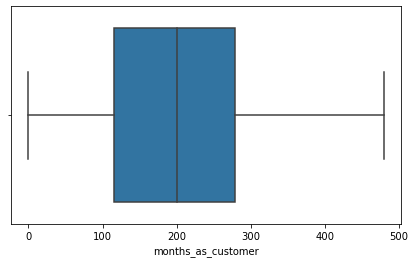



#############################################################################################################################
#############################################################################################################################




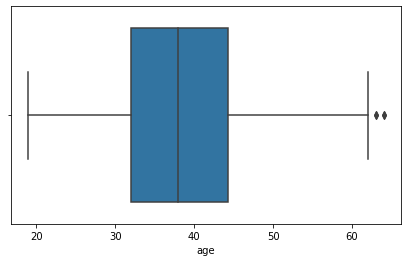



#############################################################################################################################
#############################################################################################################################




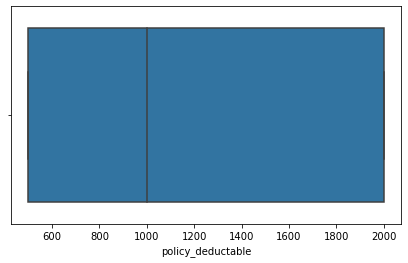



#############################################################################################################################
#############################################################################################################################




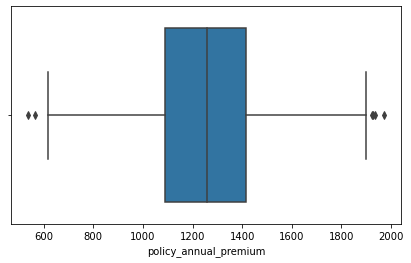



#############################################################################################################################
#############################################################################################################################




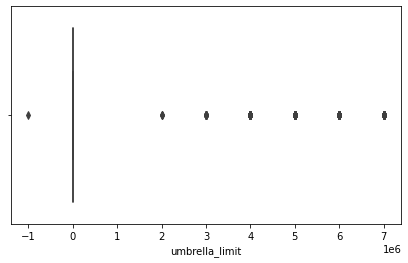



#############################################################################################################################
#############################################################################################################################




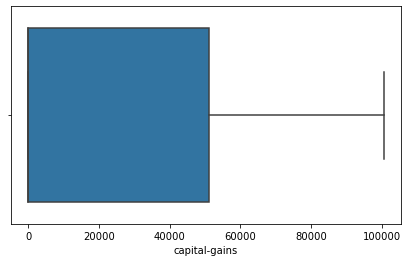



#############################################################################################################################
#############################################################################################################################




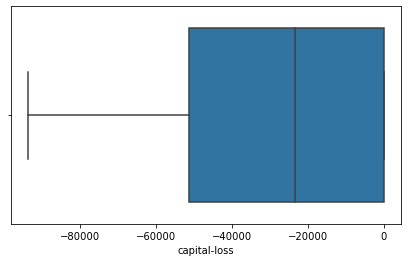



#############################################################################################################################
#############################################################################################################################




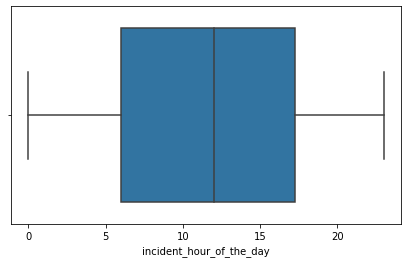



#############################################################################################################################
#############################################################################################################################




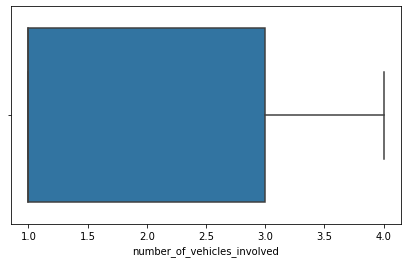



#############################################################################################################################
#############################################################################################################################




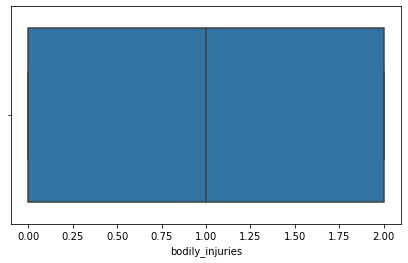



#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################




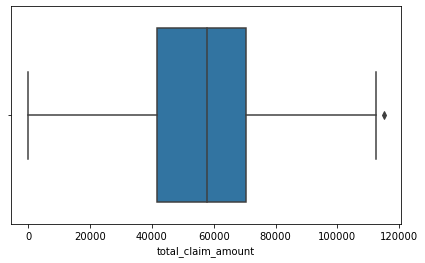



#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################




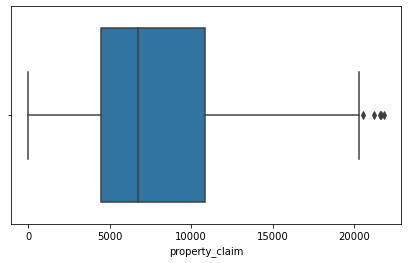



#############################################################################################################################
#############################################################################################################################




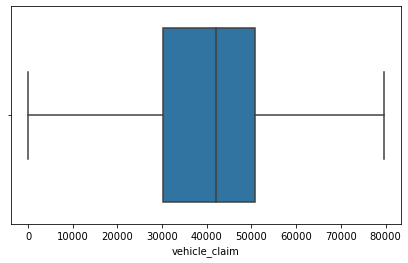



#############################################################################################################################
#############################################################################################################################




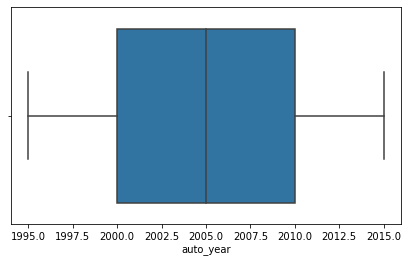



#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################






#############################################################################################################################
#############################################################################################################################




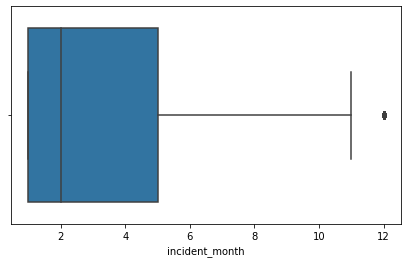



#############################################################################################################################
#############################################################################################################################




In [411]:
#Box plot of all Numerical Column
list_o=['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']
for i in list_o:
    plt.figure(figsize=(7,4))
    sns.boxplot(df_new[i])
    plt.show()
    print('\n')
    print("#"*125)
    print("#"*125)
    print('\n')

some outliers are present in numerical columns after the treatment.We will lose a lot of data if we want to remove this.
So we do not remove this Outliers

In [409]:
print(df.shape)
print(df_new.shape)

(1000, 39)
(980, 39)


In [410]:
percentage_of_dataloss=((1000-980)/1000)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 2.0


# LabelEncoding:

In [412]:
df_new.nunique().to_frame('unique values')

unique values
months_as_customer                     388
age                                     46
policy_state                             3
policy_csl                               3
policy_deductable                        3
policy_annual_premium                  971
umbrella_limit                           8
insured_sex                              2
insured_education_level                  7
insured_occupation                      14
insured_hobbies                         20
insured_relationship                     6
capital-gains                          332
capital-loss                           350
incident_type                            4
collision_type                           4
incident_severity                        4
authorities_contacted                    5
incident_state                           7
incident_city                            7
incident_hour_of_the_day                24
number_of_vehicles_involved              4
property_damage                          3
bodily_injuries                          3
witnesses                                4
police_report_available                  3
total_claim_amount                     752
injury_claim                           632
property_claim                         620
vehicle_claim                          720
auto_make                               14
auto_model                              39
auto_year                               21
fraud_reported                           2
policy_bind_day                         31
policy_bind_month                       12
policy_bind_year                        26
incident_day                            22
incident_month                          12

In [413]:
# checking for categorical columns
categorical_columns_l=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        categorical_columns_l.append(i)
print(categorical_columns_l)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [414]:
list_c=['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

In [415]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_c:
    df_new[i]=le.fit_transform(df_new[i]).astype(float)

In [416]:
df_new.head(20)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                  328   48           2.0         1.0               1000   
1                  228   42           1.0         1.0               2000   
2                  134   29           2.0         0.0               2000   
3                  256   41           0.0         1.0               2000   
4                  228   44           0.0         2.0               1000   
5                  256   39           2.0         1.0               1000   
6                  137   34           1.0         1.0               1000   
7                  165   37           0.0         0.0               1000   
8                   27   33           0.0         0.0                500   
9                  212   42           0.0         0.0                500   
10                 235   42           2.0         0.0                500   
11                 447   61           2.0         0.0               2000   
12                  60   23           2.0         2.0                500   
13                 121   34           2.0         0.0               1000   
14                 180   38           2.0         1.0               2000   
15                 473   58           1.0         0.0               2000   
16                  70   26           2.0         2.0               1000   
17                 140   31           1.0         2.0                500   
18                 160   37           2.0         2.0                500   
19                 196   39           1.0         2.0               2000   

    policy_annual_premium  umbrella_limit  insured_sex  \
0                 1406.91               0          1.0   
1                 1197.22         5000000          1.0   
2                 1413.14         5000000          0.0   
3                 1415.74         6000000          0.0   
4                 1583.91         6000000          1.0   
5                 1351.10               0          0.0   
6                 1333.35               0          1.0   
7                 1137.03               0          1.0   
8                 1442.99               0          0.0   
9                 1315.68               0          1.0   
10                1253.12         4000000          0.0   
11                1137.16               0          0.0   
12                1215.36         3000000          1.0   
13                 936.61               0          0.0   
14                1301.13               0          0.0   
15                1131.40               0          0.0   
16                1199.44         5000000          1.0   
17                 708.64         6000000          1.0   
18                1374.22               0          0.0   
19                1475.73               0          0.0   

    insured_education_level  insured_occupation  ...  vehicle_claim  \
0                       4.0                 2.0  ...          52080   
1                       4.0                 6.0  ...           3510   
2                       6.0                11.0  ...          23100   
3                       6.0                 1.0  ...          50720   
4                       0.0                11.0  ...           4550   
5                       6.0                12.0  ...          51280   
6                       6.0                 9.0  ...          50050   
7                       0.0                12.0  ...          32830   
8                       6.0                 7.0  ...          22160   
9                       6.0                 8.0  ...          32900   
10                      5.0                 3.0  ...          63280   
11                      2.0                 3.0  ...          79560   
12                      4.0                10.0  ...          42390   
13                      4.0                 1.0  ...           5040   
14                      1.0                 6.0  ...          33600   
15                      4.0                13.0  ...

In [417]:
#checking info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           980 non-null    int64  
 1   age                          980 non-null    int64  
 2   policy_state                 980 non-null    float64
 3   policy_csl                   980 non-null    float64
 4   policy_deductable            980 non-null    int64  
 5   policy_annual_premium        980 non-null    float64
 6   umbrella_limit               980 non-null    int64  
 7   insured_sex                  980 non-null    float64
 8   insured_education_level      980 non-null    float64
 9   insured_occupation           980 non-null    float64
 10  insured_hobbies              980 non-null    float64
 11  insured_relationship         980 non-null    float64
 12  capital-gains                980 non-null    int64  
 13  capital-loss        

Now data of all columns are numeric type

# Dividing data in features and vectors:

In [434]:
x=df_new.drop("fraud_reported",axis=1) #Independent variable
y=df_new.iloc[:,-6] #Dependent variable

In [435]:
x

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48           2.0         1.0               1000   
1                   228   42           1.0         1.0               2000   
2                   134   29           2.0         0.0               2000   
3                   256   41           0.0         1.0               2000   
4                   228   44           0.0         2.0               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38           2.0         2.0               1000   
996                 285   41           0.0         0.0               1000   
997                 130   34           2.0         1.0                500   
998                 458   62           0.0         2.0               2000   
999                 456   60           2.0         1.0               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0          1.0   
1                  1197.22         5000000          1.0   
2                  1413.14         5000000          0.0   
3                  1415.74         6000000          0.0   
4                  1583.91         6000000          1.0   
..                     ...             ...          ...   
995                1310.80               0          0.0   
996                1436.79               0          0.0   
997                1383.49         3000000          0.0   
998                1356.92         5000000          1.0   
999                 766.19               0          0.0   

     insured_education_level  insured_occupation  ...  property_claim  \
0                        4.0                 2.0  ...           13020   
1                        4.0                 6.0  ...             780   
2                        6.0                11.0  ...            3850   
3                        6.0                 1.0  ...            6340   
4                        0.0                11.0  ...             650   
..                       ...                 ...  ...             ...   
995                      5.0                 2.0  ...            8720   
996                      6.0                 9.0  ...           18080   
997                      5.0                 1.0  ...            7500   
998                      0.0                 5.0  ...            5220   
999                      0.0                11.0  ...             920   

     vehicle_claim  auto_make  auto_model  auto_year  policy_bind_day  \
0            52080       10.0         1.0       2004               17   
1             3510        8.0        12.0       2007               27   
2            23100        4.0        30.0       2007                9   
3            50720        3.0        34.0       2014               25   
4             4550        0.0        31.0       2009                6   
..             ...        ...         ...        ...              ...   
995          61040        6.0         6.0       2006               16   
996          72320       13.0        28.0       2015                1   
997          52500       11.0        19.0       1996               17   
998          36540        1.0         5.0       1998               18   
999           3680        8.0        12.0       2007               11   

     policy_bind_month  policy_bind_year  incident_day  incident_month  
0                   10              2014            25               1  
1                    6              2006            21               1  
2                    6              2000            22               2  
3                    5              1990             1              10  
4                    6              2014            17               2  
..                 ...               ...           ...             ...  
995                  7              1991            22               2  
996                  5           

In [436]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 980, dtype: float64

# Checking VIF score:

In [437]:
numerical_columns_o

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_day',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month']

In [438]:
p=df[['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_day',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month']]

In [439]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [440]:
#checking VIF score
vif_clac()

      VIF Factor                     features
0   2.810833e+01           months_as_customer
1   1.303232e+02                          age
2   4.576908e+00            policy_deductable
3   2.786614e+01        policy_annual_premium
4   1.246024e+00               umbrella_limit
5   1.848752e+00                capital-gains
6   1.935063e+00                 capital-loss
7   4.073177e+00     incident_hour_of_the_day
8   4.686930e+00  number_of_vehicles_involved
9   2.505823e+00              bodily_injuries
10  2.858002e+00                    witnesses
11           inf           total_claim_amount
12           inf                 injury_claim
13           inf               property_claim
14           inf                vehicle_claim
15  4.561984e+04                    auto_year
16  4.101615e+00              policy_bind_day
17  4.833867e+00            policy_bind_month
18  4.568439e+04             policy_bind_year
19  4.670665e+00                 incident_day
20  3.806933e+00               inc

VIF score is under coltrol

# Oversampling:

In [441]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [442]:
x,y=smt.fit_resample(x,y)

In [443]:
y.value_counts()

0.0    740
1.0    740
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

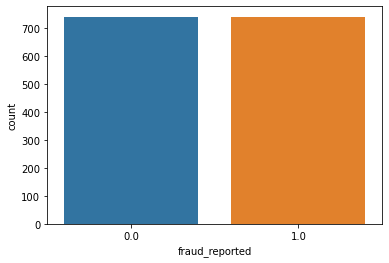

In [444]:
sns.countplot(y)

now class of the target column is balanced.

# Transforming data to remove skewness:

In [445]:
x.skew()

months_as_customer             0.334829
age                            0.436559
policy_state                  -0.130428
policy_csl                     0.145619
policy_deductable              0.455856
policy_annual_premium          0.082226
umbrella_limit                 1.693496
insured_sex                    0.127698
insured_education_level       -0.036119
insured_occupation            -0.076473
insured_hobbies                0.027139
insured_relationship           0.075522
capital-gains                  0.482578
capital-loss                  -0.290143
incident_type                  0.076510
collision_type                -0.332069
incident_severity              0.583824
authorities_contacted         -0.069188
incident_state                -0.056422
incident_city                  0.107710
incident_hour_of_the_day      -0.059076
number_of_vehicles_involved    0.634711
property_damage                0.099711
bodily_injuries                0.205801
witnesses                      0.152265


In [446]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.08572547e+00,  1.04638445e+00,  1.18494197e+00, ...,
         6.56141808e-14,  1.14304828e+00, -1.09412842e+00],
       [ 2.88499655e-01,  4.36570803e-01, -3.94676576e-02, ...,
         2.45914400e-14,  9.10248962e-01, -1.09412842e+00],
       [-5.73013813e-01, -1.18016674e+00,  1.18494197e+00, ...,
        -6.55031585e-15,  9.70942551e-01, -6.74081913e-02],
       ...,
       [-1.62188810e+00, -1.96439425e+00, -1.90965089e-01, ...,
         2.97539771e-14,  7.16297315e-01, -1.09412842e+00],
       [ 4.96803469e-01,  2.17340105e-01, -3.02472575e-01, ...,
         1.42663659e-14,  9.10248962e-01, -1.09412842e+00],
       [ 9.03213823e-02, -1.29009031e-01,  4.53276805e-01, ...,
        -4.34652314e-14,  7.08458749e-02, -6.74081913e-02]])

In [447]:
#print skewness after power transform
df_new1=pd.DataFrame(x,columns=df_new.drop("fraud_reported",axis=1).columns)
df_new1.skew()

months_as_customer            -0.114113
age                           -0.004505
policy_state                  -0.182772
policy_csl                    -0.083394
policy_deductable              0.001683
policy_annual_premium          0.002449
umbrella_limit                -9.629619
insured_sex                    0.060077
insured_education_level       -0.183106
insured_occupation            -0.212519
insured_hobbies               -0.195275
insured_relationship          -0.144132
capital-gains                  0.027830
capital-loss                   0.215461
incident_type                 -0.118162
collision_type                -0.188086
incident_severity              0.020214
authorities_contacted         -0.196681
incident_state                -0.207441
incident_city                 -0.148540
incident_hour_of_the_day      -0.239283
number_of_vehicles_involved    0.376942
property_damage               -0.096235
bodily_injuries               -0.054863
witnesses                     -0.112858


The skewness range of all columns between -0.5 and +0.5

In [448]:
#checking distribution curve of all columns after remove skewness.

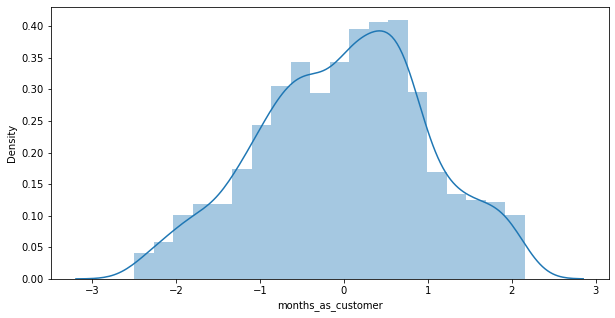

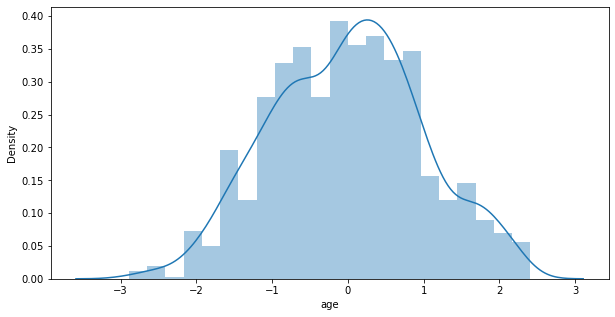

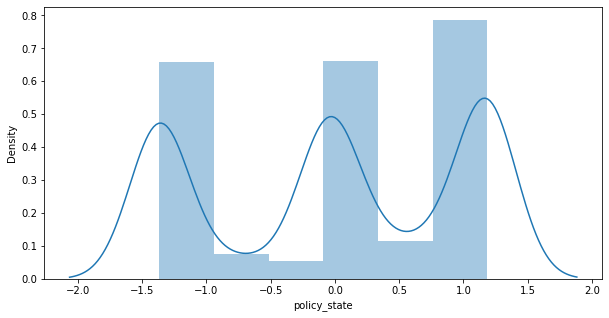

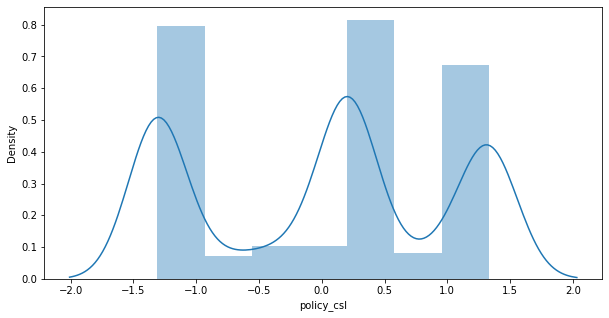

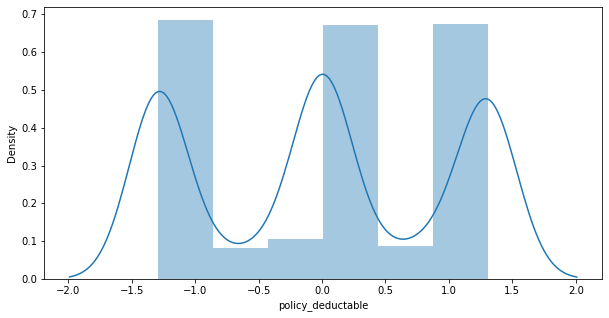

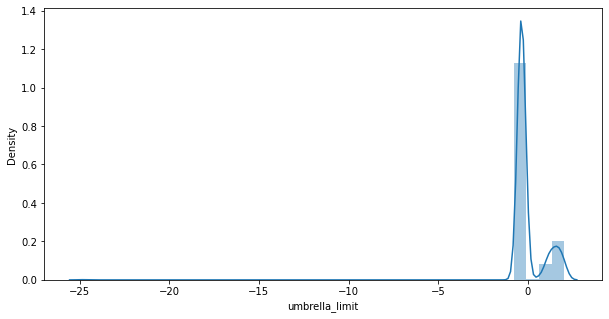

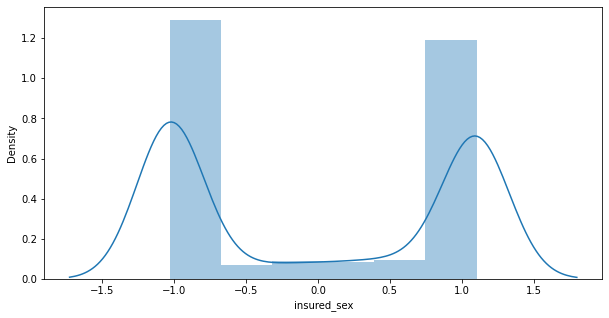

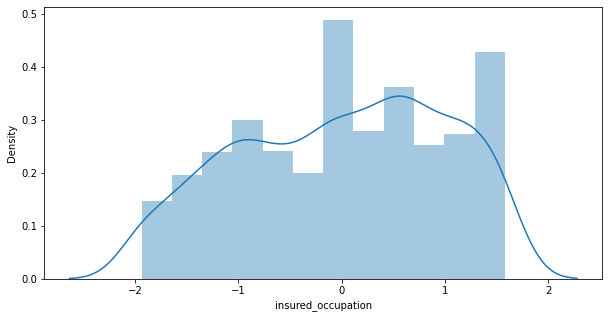

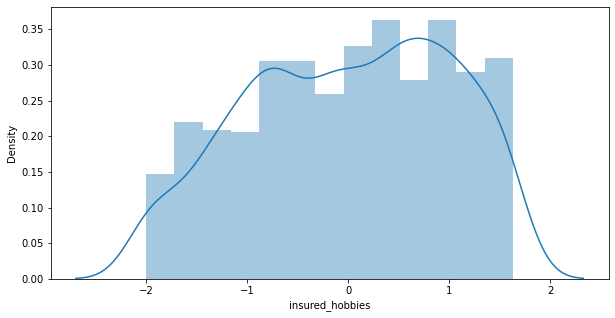

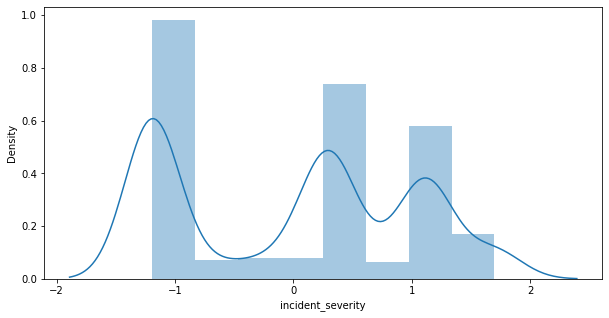

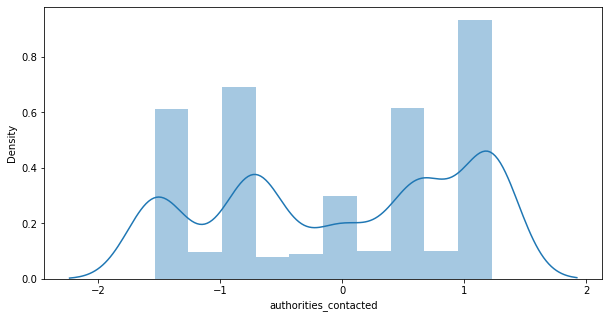

In [449]:
for i in range(18):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])    
    plt.show()

distribution curve of all columns like a normal distribution curve.

In [450]:
#Now our Data is Ready for Model Building

# Model Building:

In [451]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [452]:
x.shape

(1480, 38)

In [453]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.8108108108108109 on random state   439


we get best random state value.Now it will be used for train test split

In [454]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

In [455]:
#chacking shape of all variables which are geting from train test split function
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (1036, 38)
x_test shape = (444, 38)
y_train shape = (1036,)
y_test shape = (444,)


all shapes are right for fit to the model.

In [456]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

#creat a list of all above model
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [457]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*'*125)
    print('_'*125)
    print("\n")

Accuracy score of  LogisticRegression() is
0.8108108108108109
[[185  43]
 [ 41 175]]
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81       228
         1.0       0.80      0.81      0.81       216

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444

*****************************************************************************************************************************
_____________________________________________________________________________________________________________________________


Accuracy score of  GaussianNB() is
0.7432432432432432
[[145  83]
 [ 31 185]]
              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72       228
         1.0       0.69      0.86      0.76       216

    accuracy                           0.74       444
   macro avg       0.76      0.75      

we get best accuracy score 90% from RandomForestClassifier

# Checking Cross Val Score:

In [458]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print("\n")
    print('*'*125)
    print('*'*125)
    print("\n")

For CV = 2
cross validation score of LogisticRegression() is = 0.722972972972973
cross validation score of GaussianNB() is = 0.7006756756756757
cross validation score of SVC() is = 0.8101351351351351
cross validation score of DecisionTreeClassifier() is = 0.7851351351351351
cross validation score of KNeighborsClassifier() is = 0.6567567567567567
cross validation score of RandomForestClassifier() is = 0.8344594594594594
cross validation score of GradientBoostingClassifier() is = 0.7993243243243243
cross validation score of AdaBoostClassifier() is = 0.7878378378378379


*****************************************************************************************************************************
*****************************************************************************************************************************


For CV = 3
cross validation score of LogisticRegression() is = 0.7351613547834323
cross validation score of GaussianNB() is = 0.6986885218976603
cross validation score of 

we get best cross val score 87% from GradientBoostingClassifier at CV=8

# Parameter Tuning for GradientBoostingClassifier:

In [459]:
#creating parameter list to pass in GreadSearchCV
parameters={'loss':['deviance', 'exponential'],'learning_rate':[0.1,0.01,0.001],'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}
gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=8,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential'}

In [460]:
gcv.best_score_

0.8754323196183661

After parameter tuning we get 87% accuracy score.accuravy score is not increasing after parameter tuning.we can try Parameter Tuning for RandomForestClassifier.

# Parameter Tuning for RandomForestClassifier:

In [462]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=8,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [463]:
gcv1.best_score_

0.8629621347644604

after parameter tuning for RandomForestClassifier, we get best accuracy score from GradientBoostingClassifier.

# Creating Final Model:

In [474]:
final_model=gcv.best_estimator_

In [475]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm1))
print(classification_report(y_test,predm1))

Test Accuracy score of final model = 0.9054054054054054
Train Accuracy score of final model = 0.9623552123552124
[[200  28]
 [ 14 202]]
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       228
         1.0       0.88      0.94      0.91       216

    accuracy                           0.91       444
   macro avg       0.91      0.91      0.91       444
weighted avg       0.91      0.91      0.91       444



In [466]:
#Showing confusion matrix using Heatmap 
confusion_matrix(y_test,predm1)
sns.heatmap(confusion_matrix(y_test,predm1),annot=True, fmt='d')

<AxesSubplot:>

# ROCAUC curve:

In [476]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.08866781, 0.23253254, 0.89835474, 0.28382701, 0.94023834,
       0.80240606, 0.13850467, 0.31470286, 0.80046952, 0.02831534,
       0.26139183, 0.82689881, 0.88716506, 0.34237474, 0.828117  ,
       0.28515117, 0.25701452, 0.83809501, 0.78255254, 0.46625183,
       0.22663329, 0.17924122, 0.7897117 , 0.13712254, 0.2140348 ,
       0.93548764, 0.95484353, 0.7156352 , 0.65408438, 0.87272409,
       0.05683855, 0.21715499, 0.82304706, 0.57769604, 0.26946622,
       0.8068968 , 0.69029002, 0.84721512, 0.64952816, 0.82808829,
       0.73048077, 0.43965235, 0.34174255, 0.88325358, 0.41432544,
       0.61855996, 0.48192466, 0.92046904, 0.45215644, 0.28737101,
       0.91716344, 0.82373406, 0.5272188 , 0.02793976, 0.11754021,
       0.81359347, 0.74072668, 0.52419987, 0.2771256 , 0.39723121,
       0.92674417, 0.82187446, 0.8035149 , 0.20063632, 0.75494555,
       0.82729528, 0.60833507, 0.08784605, 0.81458664, 0.36680276,
       0.63238571, 0.58113902, 0.13733427, 0.20346186, 0.73717

In [477]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [478]:
#checking ROCAUC score
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.9061890838206628


In [479]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

In [480]:
MLdf=pd.DataFrame([final_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T
MLdf

Predicted  Original
0          0.0       0.0
1          0.0       0.0
2          1.0       1.0
3          1.0       1.0
4          1.0       1.0
..         ...       ...
439        0.0       0.0
440        0.0       0.0
441        0.0       0.0
442        0.0       0.0
443        1.0       1.0

[444 rows x 2 columns]

# Saving Model:

In [486]:
#Save the final model                                                                      
import joblib                                                                                                     
#joblib.dump(final_model,'Insurance Claims- Fraud Detection Model.pkl')